<img width="200" style="float:left" 
     src="https://upload.wikimedia.org/wikipedia/commons/f/f3/Apache_Spark_logo.svg" />

# **MODERN DATA ARCHITECTURES**: **THE MONEYBALL PROJECT**

## How to find undervalued assets in the Football market - **Notebook 1 - Retriving the data**

In this group project, we will explore two APIs provided by **API-football.com** (we will get the stats from here) and a custom **TransfermarktAPI** (we will get the market price)

### **API-football.com** 

The API is also provided through the **RapidAPI platform**, a centralised website to browser and use different APIs, 

1. We will use the credentials and we will get the data directly through this access. 

2. Keep in mind that this API is a freemium API, so although restful, we pay on a per-request basis.


### **Transfermarkt Custom Web Scrapping**

The Web Scrapping code is provided below. It extracts the valuation from the 5 major leagues

1. We will fetch the data, directly from the website

**The objective is to use both APIs to do Football Scouting by discovering footballers that are cheap and have good statistics, just like they do in the movie MONEYBALL**

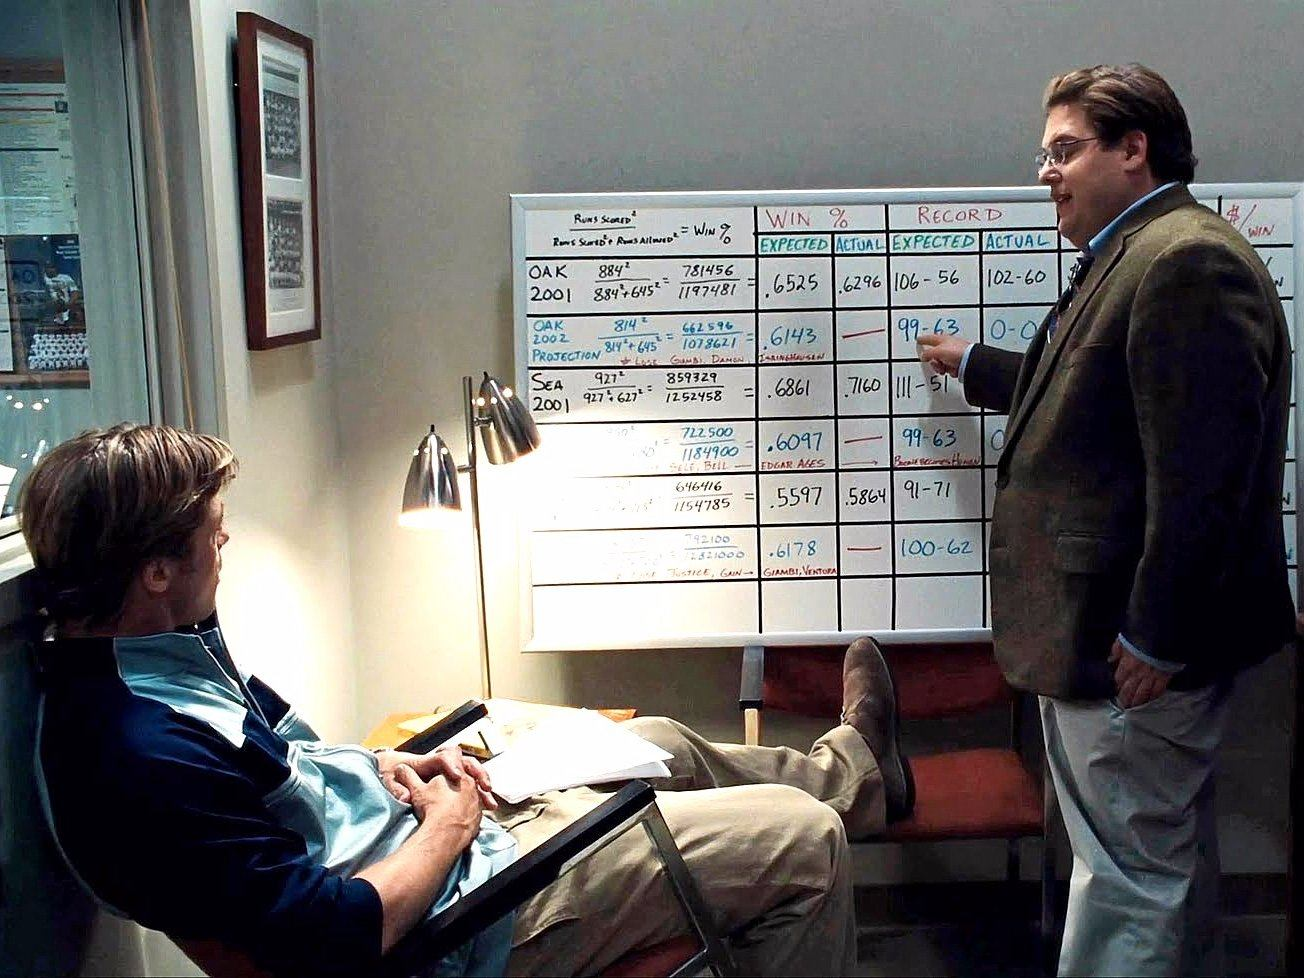

In [24]:
import pandas as pd
import http.client
import requests
import json
import unidecode

## **1. API-Football.com**

### **1.1 Importing requests and API Credentials**

In [25]:
conn = http.client.HTTPSConnection("v3.football.api-sports.io")

headers = {
    'X-RapidAPI-Key': "2b64076b5dmsh55cedbbd287b262p130039jsn520a5611cf11",
    'X-RapidAPI-Host': "api-football-v1.p.rapidapi.com"
}

conn.request("GET", "/v3/leagues", headers=headers)

res = conn.getresponse()
res



In [26]:
url = "https://api-football-v1.p.rapidapi.com/v2/leagues"

response = requests.request("GET", url, headers=headers)


response.status_code == requests.codes.ok
response  #so it has been sucessful

<Response [200]>

### **1.2 Available Leagues to query over**

In [27]:
response.json().keys()
response.json()['api'].keys()

countries_dict = response.json()['api']['leagues']
countries_dict


countries_df = pd.DataFrame.from_dict(countries_dict)
display(countries_df)

countries_df.to_csv('countries.csv', index=False)

league_id              name    type    country country_code  season  \
0             1         World Cup     Cup      World         None    2018   
1             2    Premier League  League    England           GB    2018   
2             3      Championship  League    England           GB    2018   
3             4           Ligue 1  League     France           FR    2018   
4             5           Ligue 2  League     France           FR    2018   
...         ...               ...     ...        ...          ...     ...   
6053       6089   Ligue Haïtienne  League      Haiti           HT    2024   
6054       6090               Cup     Cup    Morocco           MA    2023   
6055       6091           Serie C  League     Brazil           BR    2024   
6056       6092    Championnat D1  League      Gabon           GA    2023   
6057       6093  Torneo Federal A  League  Argentina           AR    2024   

     season_start  season_end  \
0      2018-06-14  2018-07-15   
1      2018-08-10  2019-05-12   
2      2018-08-03  2019-05-27   
3      2018-08-10  2019-05-24   
4      2018-07-27  2019-05-17   
...           ...         ...   
6053   2024-03-09  2024-03-14   
6054   2024-03-09  2024-03-10   
6055   2024-04-20  2024-08-25   
6056   2024-03-30  2024-03-31   
6057   2024-03-24  2024-07-14   

                                                   logo  \
0     https://media.api-sports.io/football/leagues/1...   
1     https://media.api-sports.io/football/leagues/3...   
2     https://media.api-sports.io/football/leagues/4...   
3     https://media.api-sports.io/football/leagues/6...   
4     https://media.api-sports.io/football/leagues/6...   
...                                                 ...   
6053  https://media.api-sports.io/football/leagues/3...   
6054  https://media.api-sports.io/football/leagues/8...   
6055  https://media.api-sports.io/football/leagues/7...   
6056  https://media.api-sports.io/football/leagues/9...   
6057  https://media.api-sports.io/football/leagues/1...   

                                          flag  standings  is_current  \
0                                         None          1           0   
1     https://media.api-sports.io/flags/gb.svg          1           0   
2     https://media.api-sports.io/flags/gb.svg          1           0   
3     https://media.api-sports.io/flags/fr.svg          1           0   
4     https://media.api-sports.io/flags/fr.svg          1           0   
...                                        ...        ...         ...   
6053  https://media.api-sports.io/flags/ht.svg          1           1   
6054  https://media.api-sports.io/flags/ma.svg          0           1   
6055  https://media.api-sports.io/flags/br.svg          1           1   
6056  https://media.api-sports.io/flags/ga.svg          1           1   
6057  https://media.api-sports.io/flags/ar.svg          1           1   

                                               coverage  
0     {'standings': True, 'fixtures': {'events': Tru...  
1     {'standings': True, 'fixtures': {'events': Tru...  
2     {'standings': True, 'fixtures': {'events': Tru...  
3     {'standings': True, 'fixtures': {'events': Tru...  
4     {'standings': True, 'fixtures': {'events': Tru...  
...                                                 ...  
6053  {'standings': True, 'fixtures': {'events': Fal...  
6054  {'standings': False, 'fixtures': {'events': Fa...  
6055  {'standings': True, 'fixtures': {'events': Fal...  
6056  {'standings': True, 'fixtures': {'events': Fal...  
6057  {'standings': True, 'fixtures': {'events': Fal...  

[6058 rows x 13 columns]

Let's look at Spain

In [28]:
Spanish_leagues = countries_df[countries_df['country'] == 'Spain']
Spanish_leagues

league_id                              name    type country  \
29           30                           La Liga  League   Spain   
32           33                  Segunda División  League   Spain   
63           64                           La Liga  League   Spain   
64           65                  Segunda División  League   Spain   
86           87                           La Liga  League   Spain   
...         ...                               ...     ...     ...   
5646       5678  Tercera División RFEF - Group 16  League   Spain   
5737       5770                   Copa Federacion     Cup   Spain   
5761       5796                      Copa del Rey     Cup   Spain   
5780       5815                         Super Cup     Cup   Spain   
5929       5964                Supercopa Femenina     Cup   Spain   

     country_code  season season_start  season_end  \
29             ES    2017   2017-08-18  2018-05-20   
32             ES    2017   2017-08-18  2018-06-16   
63             ES    2016   2016-08-19  2017-05-21   
64             ES    2016   2016-08-19  2017-06-24   
86             ES    2018   2018-08-17  2019-05-19   
...           ...     ...          ...         ...   
5646           ES    2023   2023-09-10  2024-05-12   
5737           ES    2023   2023-09-27  2023-11-22   
5761           ES    2023   2023-10-11  2024-04-06   
5780           ES    2023   2024-01-10  2024-01-14   
5929           ES    2023   2024-01-16  2024-01-20   

                                                   logo  \
29    https://media.api-sports.io/football/leagues/1...   
32    https://media.api-sports.io/football/leagues/1...   
63    https://media.api-sports.io/football/leagues/1...   
64    https://media.api-sports.io/football/leagues/1...   
86    https://media.api-sports.io/football/leagues/1...   
...                                                 ...   
5646  https://media.api-sports.io/football/leagues/4...   
5737  https://media.api-sports.io/football/leagues/7...   
5761  https://media.api-sports.io/football/leagues/1...   
5780  https://media.api-sports.io/football/leagues/5...   
5929  https://media.api-sports.io/football/leagues/1...   

                                          flag  standings  is_current  \
29    https://media.api-sports.io/flags/es.svg          1           0   
32    https://media.api-sports.io/flags/es.svg          1           0   
63    https://media.api-sports.io/flags/es.svg          1           0   
64    https://media.api-sports.io/flags/es.svg          1           0   
86    https://media.api-sports.io/flags/es.svg          1           0   
...                                        ...        ...         ...   
5646  https://media.api-sports.io/flags/es.svg          1           1   
5737  https://media.api-sports.io/flags/es.svg          0           1   
5761  https://media.api-sports.io/flags/es.svg          0           1   
5780  https://media.api-sports.io/flags/es.svg          0           1   
5929  https://media.api-sports.io/flags/es.svg          0           1   

                                               coverage  
29    {'standings': True, 'fixtures': {'events': Tru...  
32    {'standings': True, 'fixtures': {'events': Tru...  
63    {'standings': True, 'fixtures': {'events': Tru...  
64    {'standings': True, 'fixtures': {'events': Tru...  
86    {'standings': True, 'fixtures': {'events': Tru...  
...                                                 ...  
5646  {'standings': True, 'fixtures': {'events': Tru...  
5737  {'standings': False, 'fixtures': {'events': Tr...  
5761  {'standings': False, 'fixtures': {'events': Tr...  
5780  {'standings': False, 'fixtures': {'events': Tr...  
5929  {'standings': False, 'fixtures': {'events': Tr...  

[172 rows x 13 columns]

As we are a small team, we are only interested now in LaLiga. Lets query it checking the documentation. You will see that LaLiga, Segunda Division and Group1 and Group2 of Primera División RFEF hold IDs: **140,141,435 and 436**

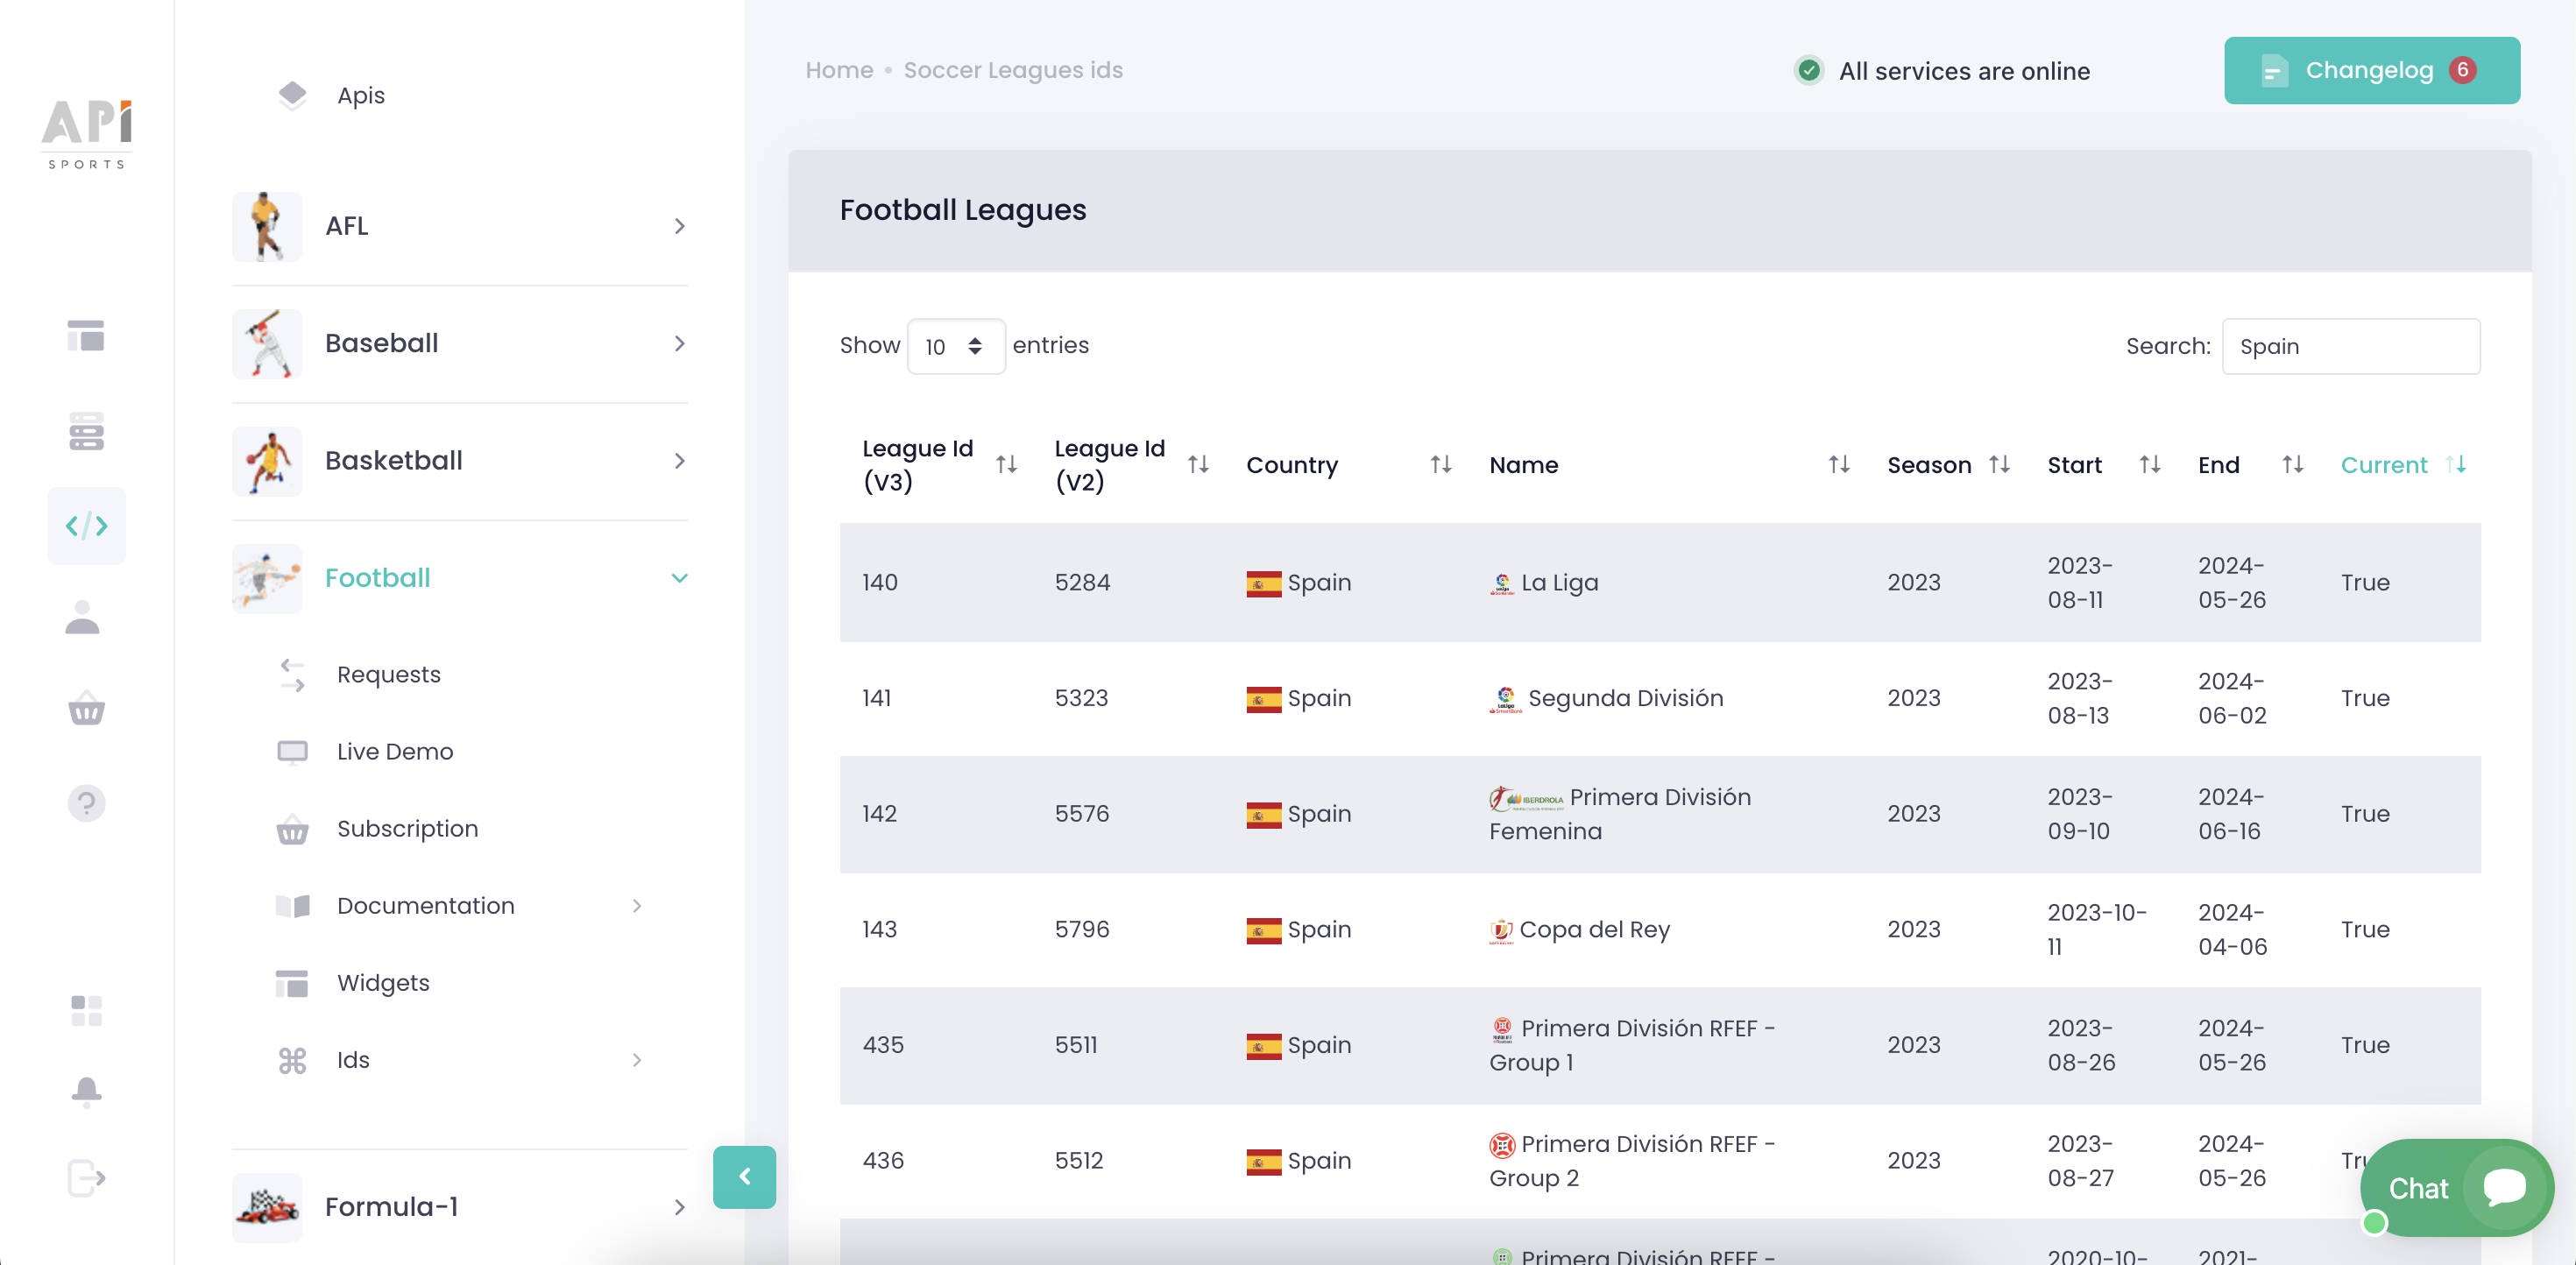

We can also query it, but currently the league_id on V3 is only "watchable" through the website. Let's pick only the current seasons

In [29]:
# Conditions for filtering
country_condition = countries_df['country'] == 'Spain'
name_condition = (countries_df['name'] == 'La Liga') | (countries_df['name'] == 'Segunda División')
season_condition = (countries_df['season'] == 2023)

# Apply all conditions using '&' for AND and '|' for OR
filtered_leagues = Spanish_leagues[country_condition & name_condition & season_condition]

# Display the filtered DataFrame
filtered_leagues

/var/folders/62/dhqbng2n4t13zyp_j88h5gm80000gn/T/ipykernel_71917/3508393662.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_leagues = Spanish_leagues[country_condition & name_condition & season_condition]


league_id              name    type country country_code  season  \
5254       5284           La Liga  League   Spain           ES    2023   
5293       5323  Segunda División  League   Spain           ES    2023   

     season_start  season_end  \
5254   2023-08-11  2024-05-26   
5293   2023-08-13  2024-06-02   

                                                   logo  \
5254  https://media.api-sports.io/football/leagues/1...   
5293  https://media.api-sports.io/football/leagues/1...   

                                          flag  standings  is_current  \
5254  https://media.api-sports.io/flags/es.svg          1           1   
5293  https://media.api-sports.io/flags/es.svg          1           1   

                                               coverage  
5254  {'standings': True, 'fixtures': {'events': Tru...  
5293  {'standings': True, 'fixtures': {'events': Tru...

### **1.3 Retrieving the data**

#### 1.3.1 Pagination

Ok, so with the id, we are going to query over the API and retrieve all players and its 2023 stats from LaLiga, then from Segunda and then from Primera División RFEF.

In [30]:
url = "https://api-football-v1.p.rapidapi.com/v3/players"

querystring = {"league":"140","season":"2023"}

headers = {
	"X-RapidAPI-Key": "2b64076b5dmsh55cedbbd287b262p130039jsn520a5611cf11",
	"X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)


In [31]:
response.status_code == requests.codes.ok
response.json().keys()
response.json().keys()

players_dict = response.json()['response']

# Visualize df for all English Premier league seasons available
players_dict = pd.DataFrame.from_dict(players_dict)
display(players_dict)




player  \
0   {'id': 83, 'name': 'A. Danjuma', 'firstname': ...   
1   {'id': 274, 'name': 'E. Cavani', 'firstname': ...   
2   {'id': 634, 'name': 'David Silva', 'firstname'...   
3   {'id': 1584, 'name': 'Loren Morón', 'firstname...   
4   {'id': 1699, 'name': 'Iborra', 'firstname': 'V...   
5   {'id': 1700, 'name': 'Iván Martín', 'firstname...   
6   {'id': 18742, 'name': 'M. Doherty', 'firstname...   
7   {'id': 18949, 'name': 'Oriol Romeu', 'firstnam...   
8   {'id': 32871, 'name': 'T. Hara', 'firstname': ...   
9   {'id': 46910, 'name': 'Iván Martos', 'firstnam...   
10  {'id': 47080, 'name': 'Jorge Sáenz', 'firstnam...   
11  {'id': 170541, 'name': 'Miquel Llabrés', 'firs...   
12  {'id': 182496, 'name': 'Joel del Pino', 'first...   
13  {'id': 182515, 'name': 'Claudio', 'firstname':...   
14  {'id': 182588, 'name': 'Juan Artola', 'firstna...   
15  {'id': 182627, 'name': 'Alex Petxarroman', 'fi...   
16  {'id': 276995, 'name': 'F. Mwepu', 'firstname'...   
17  {'id': 289788, 'name': 'Yoel Ramírez', 'firstn...   
18  {'id': 347886, 'name': 'Félix Garreta', 'first...   
19  {'id': 371912, 'name': 'Dani Rodríguez', 'firs...   

                                           statistics  
0   [{'team': {'id': 533, 'name': 'Villarreal', 'l...  
1   [{'team': {'id': 532, 'name': 'Valencia', 'log...  
2   [{'team': {'id': 548, 'name': 'Real Sociedad',...  
3   [{'team': {'id': 543, 'name': 'Real Betis', 'l...  
4   [{'team': {'id': 533, 'name': 'Villarreal', 'l...  
5   [{'team': {'id': 533, 'name': 'Villarreal', 'l...  
6   [{'team': {'id': 530, 'name': 'Atletico Madrid...  
7   [{'team': {'id': 547, 'name': 'Girona', 'logo'...  
8   [{'team': {'id': 542, 'name': 'Alaves', 'logo'...  
9   [{'team': {'id': 723, 'name': 'Almeria', 'logo...  
10  [{'team': {'id': 532, 'name': 'Valencia', 'log...  
11  [{'team': {'id': 798, 'name': 'Mallorca', 'log...  
12  [{'team': {'id': 534, 'name': 'Las Palmas', 'l...  
13  [{'team': {'id': 534, 'name': 'Las Palmas', 'l...  
14  [{'team': {'id': 531, 'name': 'Athletic Club',...  
15  [{'team': {'id': 531, 'name': 'Athletic Club',...  
16  [{'team': {'id': 724, 'name': 'Cadiz', 'logo':...  
17  [{'team': {'id': 727, 'name': 'Osasuna', 'logo...  
18  [{'team': {'id': 543, 'name': 'Real Betis', 'l...  
19  [{'team': {'id': 529, 'name': 'Barcelona', 'lo...

Damn it! it only retrieves 20 results, This is due to... PAGINATION! and in a format we dont like, we need to make it pretty!

#### 1.3.2 Then Loop it!

Okay, here we go, the following is a function to go page by page extracting the details we need. 

This will make an API call each time a page is requested and it will allow us to store all players in the current league. We will repeat it for every league we want to explore

In [32]:
import requests
from time import sleep

def fetch_players_by_page(league_id,season,page_number):
    
    url = f"https://api-football-v1.p.rapidapi.com/v3/players?league={league_id}&season={season}&page={page_number}"
    headers = {
        'X-RapidAPI-Key': "2b64076b5dmsh55cedbbd287b262p130039jsn520a5611cf11",
        'X-RapidAPI-Host': "api-football-v1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch players for league {league_id} for page {page_number}: {response.status_code}")
        return None
    

    
# Function to iterate through all pages and fetch players
def fetch_all_players(league_id,season):
    all_players = []
    page_number = 1
    while True:
        data = fetch_players_by_page(league_id,season, page_number)
        if data and data['response']:  # If there is data and the list of players is not empty
            all_players.extend(data['response'])
            page_number += 1
            sleep(1)  # Sleep to avoid hitting rate limit
        else:
            break  # Break the loop if no more data is returned
    return all_players


In [33]:
# Example of fetching all player data for La Liga (league_id=140) for the 2023 season
all_players_laliga_2023 = fetch_all_players(140,2023)



In [34]:
all_players_laliga_2023

[{'player': {'id': 83,
   'name': 'A. Danjuma',
   'firstname': 'Arnaut',
   'lastname': 'Danjuma Adam Groeneveld',
   'age': 26,
   'birth': {'date': '1997-01-31', 'place': 'Lagos', 'country': 'Nigeria'},
   'nationality': 'Netherlands',
   'height': '178 cm',
   'weight': '74 kg',
   'injured': False,
   'photo': 'https://media.api-sports.io/football/players/83.png'},
  'statistics': [{'team': {'id': 533,
     'name': 'Villarreal',
     'logo': 'https://media.api-sports.io/football/teams/533.png'},
    'league': {'id': 140,
     'name': 'La Liga',
     'country': 'Spain',
     'logo': 'https://media.api-sports.io/football/leagues/140.png',
     'flag': 'https://media.api-sports.io/flags/es.svg',
     'season': 2023},
    'games': {'appearences': None,
     'lineups': None,
     'minutes': None,
     'number': None,
     'position': 'Attacker',
     'rating': None,
     'captain': False},
    'substitutes': {'in': None, 'out': None, 'bench': None},
    'shots': {'total': None, 'on': N

In [35]:
all_players_segunda_2023 = fetch_all_players(141,2023)

In [36]:
all_players_PrimeraRFEFG1_2023 = fetch_all_players(435,2023)

In [37]:
all_players_PrimeraRFEFG2_2023 = fetch_all_players(436,2023)

In [38]:
all_players_premierleague_2023 = fetch_all_players(39,2023)

In [39]:
all_players_championshipleague_2023 = fetch_all_players(40,2023)

In [40]:
all_players_leagueone_2023 = fetch_all_players(41,2023)

In [41]:
all_players_serieA_2023 = fetch_all_players(135,2023)

In [42]:
all_players_serieB_2023 = fetch_all_players(136,2023)

In [43]:
all_players_Ligue1_2023 = fetch_all_players(61,2023)

In [44]:
all_players_Ligue2_2023 = fetch_all_players(62,2023)

In [45]:
all_players_National1_2023 = fetch_all_players(63,2023)

In [46]:
all_players_Bundesliga_2023 = fetch_all_players(78,2023)

In [47]:
all_players_Bundesliga2_2023 = fetch_all_players(79,2023)

In [48]:
all_players_Liga3_2023 = fetch_all_players(80,2023)

#### 1.3.3 Spain: Make it pretty!

These JSON docs look super ugly so we will flatten/parse them into nice dataframes

##### **First Division**

In [49]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_laliga_2023_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_laliga_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_laliga_2023_details = pd.concat([df_all_players_laliga_2023_details, df_player_detailed_corrected], ignore_index=True)



In [50]:

df_all_players_laliga_2023_details.drop('player_birth', axis=1, inplace=True)

df_all_players_laliga_2023_details['division'] = '1'
df_all_players_laliga_2023_details['league'] = 'La Liga'
df_all_players_laliga_2023_details['player_weight'] = df_all_players_laliga_2023_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_laliga_2023_details['player_height'] = df_all_players_laliga_2023_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_laliga_2023_details = df_all_players_laliga_2023_details[ (df_all_players_laliga_2023_details['appearences'].notna() 
                                                                          & df_all_players_laliga_2023_details['appearences'] != 0)]

df_all_players_laliga_2023_details

player_id     player_name player_firstname          player_lastname  \
100         56    A. Griezmann          Antoine                Griezmann   
102        521  R. Lewandowski           Robert              Lewandowski   
104       2923     Y. Carrasco          Yannick        Ferreira Carrasco   
106      46090     N. Petrović           Njegoš                 Petrović   
107      47041   Alberto Perea   Alberto Álvaro           Perea Correoso   
..         ...             ...              ...                      ...   
864      18776      Ç. Söyüncü           Çağlar                  Söyüncü   
865      46987  Raúl Fernández             Raúl  Fernández-Cavada Mateos   
866      47250      D. Dakonam            Djené           Dakonam Ortega   
867      50048       V. Muriqi            Vedat                   Muriqi   
871     269163     W. Swedberg     Williot Theo                 Swedberg   

    player_age player_nationality  player_height  player_weight  \
100         33             France          176.0           73.0   
102         36             Poland          185.0           81.0   
104         31            Belgium          181.0           73.0   
106         25             Serbia          185.0           72.0   
107         34              Spain          177.0           74.0   
..         ...                ...            ...            ...   
864         28            Türkiye          185.0           82.0   
865         36              Spain          195.0           92.0   
866         33               Togo          187.0           72.0   
867         30             Kosovo          194.0           92.0   
871         20             Sweden          185.0           78.0   

     player_injured                                       player_photo  ...  \
100           False  https://media.api-sports.io/football/players/5...  ...   
102           False  https://media.api-sports.io/football/players/5...  ...   
104           False  https://media.api-sports.io/football/players/2...  ...   
106           False  https://media.api-sports.io/football/players/4...  ...   
107           False  https://media.api-sports.io/football/players/4...  ...   
..              ...                                                ...  ...   
864           False  https://media.api-sports.io/football/players/1...  ...   
865           False  https://media.api-sports.io/football/players/4...  ...   
866           False  https://media.api-sports.io/football/players/4...  ...   
867           False  https://media.api-sports.io/football/players/5...  ...   
871           False  https://media.api-sports.io/football/players/2...  ...   

    cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
100            3               0         0         None             None   
102            4               0         0         None             None   
104            0               0         0         None             None   
106            0               0         0         None             None   
107            0               0         0         None             None   
..           ...             ...       ...          ...              ...   
864            0               0         1         None             None   
865            0               0         0         None             None   
866           12               1         0         None             None   
867            2               0         0         None             None   
871            0               0         0         None             None   

    penalty.scored penalty.missed penalty.saved  division   league  
100              3              0          None         1  La Liga  
102              3              0          None         1  La Liga  
104              0              0          None         1  La Liga  
106              0              0          None         1  La Liga  
107              0              0          None         1  La Liga  
..         

In [51]:
df_all_players_laliga_2023_details[df_all_players_laliga_2023_details['team.name'] == 'Real Madrid']

player_id      player_name     player_firstname  \
134     129718    J. Bellingham  Jude Victor William   
310     336711   Gonzalo García              Gonzalo   
312     343202     Á. Rodríguez        Álvaro Daniel   
314     350037           N. Paz              Nicolás   
321        762  Vinícius Júnior        Vinícius José   
322      10009          Rodrygo              Rodrygo   
324      18907           Joselu            José Luis   
337     291964         A. Güler                 Arda   
340        372     Éder Militão         Éder Gabriel   
341        505         D. Alaba                David   
342        653         F. Mendy        Ferland Sinna   
344        733    Dani Carvajal               Daniel   
345        735            Nacho         José Ignacio   
346        736      Fran García       Francisco José   
347        744      Brahim Díaz               Brahim   
348        752         T. Kroos                 Toni   
349        754        L. Modrić                 Luka   
350        756      F. Valverde    Federico Santiago   
351        757    Lucas Vázquez                Lucas   
352       1271    A. Tchouaméni       Aurélien Djani   
353       2207     E. Camavinga              Eduardo   
354       2273             Kepa                 Kepa   
355       2285       A. Rüdiger              Antonio   
358      47400         A. Lunin               Andrii   
821        748    Dani Ceballos               Daniel   

               player_lastname player_age player_nationality  player_height  \
134                 Bellingham         21            England          186.0   
310              García Torres         20              Spain          182.0   
312            Rodríguez Muñoz         20            Uruguay          192.0   
314               Paz Martínez         20          Argentina          186.0   
321  Paixão de Oliveira Júnior         24             Brazil          176.0   
322              Silva de Goes         23             Brazil          174.0   
324             Sanmartín Mato         34              Spain          192.0   
337                      Güler         19            Türkiye          176.0   
340                    Militão         26             Brazil          186.0   
341           Olatukunbo Alaba         32            Austria          180.0   
342                      Mendy         29             France          180.0   
344             Carvajal Ramos         32              Spain          173.0   
345         Fernández Iglesias         34              Spain          180.0   
346              García Torres         25              Spain          167.0   
347            Abdelkader Díaz         25            Morocco          171.0   
348                      Kroos         34            Germany          183.0   
349                     Modrić         39            Croatia          172.0   
350           Valverde Dipetta         26            Uruguay          182.0   
351           Vázquez Iglesias         33              Spain          173.0   
352                 Tchouaméni         24             France          187.0   
353            Celmi Camavinga         22             France          182.0   
354      Arrizabalaga Revuelta         30              Spain          189.0   
355                    Rüdiger         31            Germany          190.0   
358                      Lunin         25            Ukraine          191.0   
821         Ceballos Fernández         28              Spain          179.0   

     player_weight  player_injured  \
134           75.0           False   
310           74.0           False   
312           81.0           False   
314           74.0           False   
321           73.0           False   
322           64.0           False   
324           80.0           False   
337            NaN           False   
340           78.0           False   
341           78.0           False   
342           73.0           False   
344           73.0           False   

##### **Second Division**

In [52]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_segunda_2023_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_segunda_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_segunda_2023_details = pd.concat([df_all_players_segunda_2023_details, df_player_detailed_corrected], ignore_index=True)


df_all_players_segunda_2023_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   player_id              921 non-null    int64 
 1   player_name            921 non-null    object
 2   player_firstname       921 non-null    object
 3   player_lastname        921 non-null    object
 4   player_age             916 non-null    object
 5   player_birth           921 non-null    object
 6   player_nationality     921 non-null    object
 7   player_height          709 non-null    object
 8   player_weight          584 non-null    object
 9   player_injured         921 non-null    bool  
 10  player_photo           921 non-null    object
 11  birth_date             916 non-null    object
 12  birth_place            770 non-null    object
 13  birth_country          921 non-null    object
 14  id                     921 non-null    int64 
 15  name                   

In [53]:
#drop column player_birth

df_all_players_segunda_2023_details.drop('player_birth', axis=1, inplace=True)

df_all_players_segunda_2023_details['division'] = '2'
df_all_players_segunda_2023_details['league'] = 'Segunda Division'
df_all_players_segunda_2023_details['player_weight'] = df_all_players_segunda_2023_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_segunda_2023_details['player_height'] = df_all_players_segunda_2023_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_segunda_2023_details = df_all_players_segunda_2023_details[ (df_all_players_segunda_2023_details['appearences'].notna() 
                                                                          & df_all_players_segunda_2023_details['appearences'] != 0)]


df_all_players_segunda_2023_details

player_id       player_name  player_firstname     player_lastname  \
160       1038          H. Hevel  Hector Alexander               Hevel   
164      14384       T. Datković              Toni            Datković   
165      21047          A. Kanté        Aboubakary               Kanté   
167      47366              Jony          Jonathan  Rodríguez Menéndez   
171     161974       M. Da Graca      Cosimo Marco            Da Graca   
..         ...               ...               ...                 ...   
914     181685   Álvaro Mantilla            Álvaro      Mantilla Pérez   
915     182686      Iván Morante              Iván        Morante Ruiz   
917     183683  Íñigo Sainz-Maza             Íñigo    Sainz-Maza Serna   
919     385767      Mario García             Mario       García Alvear   
920       1434         L. Dimata       Landry Nany              Dimata   

    player_age player_nationality  player_height  player_weight  \
160         28        Netherlands          171.0           67.0   
164         31            Croatia          190.0           78.0   
165         30             Gambia          184.0           80.0   
167         33              Spain          179.0           76.0   
171         22              Italy          185.0            NaN   
..         ...                ...            ...            ...   
914         24              Spain          184.0           71.0   
915         23              Spain          183.0           75.0   
917         26              Spain          181.0           71.0   
919         21              Spain          172.0           64.0   
920         27            Belgium          185.0           81.0   

     player_injured                                       player_photo  ...  \
160           False  https://media.api-sports.io/football/players/1...  ...   
164           False  https://media.api-sports.io/football/players/1...  ...   
165           False  https://media.api-sports.io/football/players/2...  ...   
167           False  https://media.api-sports.io/football/players/4...  ...   
171           False  https://media.api-sports.io/football/players/1...  ...   
..              ...                                                ...  ...   
914           False  https://media.api-sports.io/football/players/1...  ...   
915           False  https://media.api-sports.io/football/players/1...  ...   
917           False  https://media.api-sports.io/football/players/1...  ...   
919           False  https://media.api-sports.io/football/players/3...  ...   
920           False  https://media.api-sports.io/football/players/1...  ...   

    cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
160            3               0         0         None             None   
164            2               0         0         None             None   
165            2               0         0         None             None   
167            1               0         0         None             None   
171            1               0         0         None             None   
..           ...             ...       ...          ...              ...   
914            5               0         0         None             None   
915            4               0         1         None             None   
917            4               0         0         None             None   
919            4               0         0         None             None   
920            0               0         0         None             None   

    penalty.scored penalty.missed penalty.saved  division            league  
160              0              0          None         2  Segunda Division  
164              0              0          None         2  Segunda Division  
165              0              0          None         2  Segunda Division  
167              0              0          None         2  Segunda Division  
171              0              0          None         2  

##### **First RFEF - Group 1**

In [54]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_primerarfef_G1_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_PrimeraRFEFG1_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_primerarfef_G1_details = pd.concat([df_all_players_primerarfef_G1_details, df_player_detailed_corrected], ignore_index=True)


df_all_players_primerarfef_G1_details

player_id       player_name player_firstname      player_lastname  \
0          7326        P. Pokorný            Peter              Pokorný   
1         46840      Hugo Vallejo     Hugo Claudio       Vallejo Avilés   
2         55452      Álvaro Muñiz           Álvaro        Muñiz Cegarra   
3         65693   Juanmi Callejón      Juan Miguel       Callejón Bueno   
4        105095     Ángel Sánchez            Ángel         Sánchez Baró   
...         ...               ...              ...                  ...   
1525     182265  Jordan Hernández     Jordan Jesús  Hernández Capdevila   
1526     286006   Iván de la Peña             Iván    de la Peña Asensi   
1527     287176              Retu          Alberto     Retuerta Cuadros   
1528     292140          Marchena     Antonio José      Marchena Millán   
1529     330468       Carlos León      José Carlos           León Amate   

     player_age                                       player_birth  \
0            22  {'date': '2001-08-08', 'place': 'Trenčín', 'co...   
1            23  {'date': '2000-02-15', 'place': 'Granada', 'co...   
2            35  {'date': '1988-09-07', 'place': 'Gijón', 'coun...   
3            36  {'date': '1987-02-11', 'place': 'Motril', 'cou...   
4            27  {'date': '1997-07-28', 'place': 'Marratxí', 'c...   
...         ...                                                ...   
1525         28  {'date': '1996-03-17', 'place': 'Las Palmas de...   
1526         23  {'date': '2001-04-09', 'place': None, 'country...   
1527         22  {'date': '2002-01-01', 'place': 'Madrid', 'cou...   
1528         22  {'date': '2002-07-27', 'place': 'Brenes', 'cou...   
1529         20  {'date': '2004-11-15', 'place': 'Málaga', 'cou...   

     player_nationality player_height player_weight  player_injured  ...  \
0              Slovakia        183 cm          None           False  ...   
1                 Spain        181 cm         77 kg           False  ...   
2                 Spain        182 cm         70 kg           False  ...   
3                 Spain        179 cm         70 kg           False  ...   
4                 Spain        180 cm          None           False  ...   
...                 ...           ...           ...             ...  ...   
1525              Spain          None          None           False  ...   
1526              Spain          None          None           False  ...   
1527              Spain        186 cm         70 kg           False  ...   
1528              Spain        182 cm         71 kg           False  ...   
1529              Spain        170 cm          None           False  ...   

     fouls.drawn fouls.committed cards.yellow cards.yellowred  cards.red  \
0           None            None         None            None       None   
1           None            None         None            None       None   
2           None            None         None            None       None   
3           None            None         None            None       None   
4           None            None         None            None       None   
...          ...             ...          ...             ...        ...   
1525        None            None            1               0          0   
1526        None            None            0               0          0   
1527        None            None            1               0          0   
1528        None            None            0               0          1   
1529        None            None            3               0          0   

     penalty.won penalty.commited penalty.scored penalty.missed  penalty.saved  
0           None             None           None           None           None  
1           None             None           None           None           None  
2           None             None           None           None           None  
3           None             None           None           None           None  
4           None             None

In [55]:

df_all_players_primerarfef_G1_details.drop('player_birth', axis=1, inplace=True)
df_all_players_primerarfef_G1_details['division'] = '3'
df_all_players_primerarfef_G1_details['league'] = 'Primera RFEF G1'
df_all_players_primerarfef_G1_details['player_weight'] = df_all_players_primerarfef_G1_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_primerarfef_G1_details['player_height'] = df_all_players_primerarfef_G1_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_primerarfef_G1_details = df_all_players_primerarfef_G1_details[ (df_all_players_primerarfef_G1_details['appearences'].notna() 
                                                                          & df_all_players_primerarfef_G1_details['appearences'] != 0)]


df_all_players_primerarfef_G1_details

player_id       player_name player_firstname      player_lastname  \
260      105026           Cordero     Miguel Ángel      Cordero Sánchez   
280       46668     Xisco Jiménez        Francisco       Jiménez Tejada   
281       46687     Ángel Montoro            Ángel      Montoro Sánchez   
283       60096      Martí Crespí            Martí       Crespí Pascual   
286      128580      Rubén Lobato            Rubén         Lobato Cabal   
...         ...               ...              ...                  ...   
1524     179130      Rubén Solano            Rubén       Solano Sánchez   
1525     182265  Jordan Hernández     Jordan Jesús  Hernández Capdevila   
1527     287176              Retu          Alberto     Retuerta Cuadros   
1528     292140          Marchena     Antonio José      Marchena Millán   
1529     330468       Carlos León      José Carlos           León Amate   

     player_age player_nationality  player_height  player_weight  \
260          36              Spain          178.0           72.0   
280          38              Spain          190.0           84.0   
281          36              Spain          181.0           72.0   
283          37              Spain          185.0           75.0   
286          30              Spain          180.0           75.0   
...         ...                ...            ...            ...   
1524         31              Spain          181.0           70.0   
1525         28              Spain            NaN            NaN   
1527         22              Spain          186.0           70.0   
1528         22              Spain          182.0           71.0   
1529         20              Spain          170.0            NaN   

      player_injured                                       player_photo  ...  \
260            False  https://media.api-sports.io/football/players/1...  ...   
280            False  https://media.api-sports.io/football/players/4...  ...   
281            False  https://media.api-sports.io/football/players/4...  ...   
283            False  https://media.api-sports.io/football/players/6...  ...   
286            False  https://media.api-sports.io/football/players/1...  ...   
...              ...                                                ...  ...   
1524           False  https://media.api-sports.io/football/players/1...  ...   
1525           False  https://media.api-sports.io/football/players/1...  ...   
1527           False  https://media.api-sports.io/football/players/2...  ...   
1528           False  https://media.api-sports.io/football/players/2...  ...   
1529           False  https://media.api-sports.io/football/players/3...  ...   

     cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
260             2               0         0         None             None   
280             1               0         0         None             None   
281             1               0         0         None             None   
283             0               0         0         None             None   
286             3               0         0         None             None   
...           ...             ...       ...          ...              ...   
1524            0               0         0         None             None   
1525            1               0         0         None             None   
1527            1               0         0         None             None   
1528            0               0         1         None             None   
1529            3               0         0         None             None   

     penalty.scored penalty.missed penalty.saved  division           league  
260            None           None          None         3  Primera RFEF G1  
280            None           None          None         3  Primera RFEF G1  
281            None           None          None         3  Primera RFEF G1  
283            None           None          None         3  Primera RFEF G1  
286         

##### **First RFEF - Group 2**

In [56]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_primerarfef_G2_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_PrimeraRFEFG2_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_primerarfef_G2_details = pd.concat([df_all_players_primerarfef_G2_details, df_player_detailed_corrected], ignore_index=True)


df_all_players_primerarfef_G2_details

player_id       player_name player_firstname      player_lastname  \
0          7326        P. Pokorný            Peter              Pokorný   
1         46840      Hugo Vallejo     Hugo Claudio       Vallejo Avilés   
2         55452      Álvaro Muñiz           Álvaro        Muñiz Cegarra   
3         65693   Juanmi Callejón      Juan Miguel       Callejón Bueno   
4        105095     Ángel Sánchez            Ángel         Sánchez Baró   
...         ...               ...              ...                  ...   
1525     182265  Jordan Hernández     Jordan Jesús  Hernández Capdevila   
1526     286006   Iván de la Peña             Iván    de la Peña Asensi   
1527     287176              Retu          Alberto     Retuerta Cuadros   
1528     292140          Marchena     Antonio José      Marchena Millán   
1529     330468       Carlos León      José Carlos           León Amate   

     player_age                                       player_birth  \
0            22  {'date': '2001-08-08', 'place': 'Trenčín', 'co...   
1            23  {'date': '2000-02-15', 'place': 'Granada', 'co...   
2            35  {'date': '1988-09-07', 'place': 'Gijón', 'coun...   
3            36  {'date': '1987-02-11', 'place': 'Motril', 'cou...   
4            27  {'date': '1997-07-28', 'place': 'Marratxí', 'c...   
...         ...                                                ...   
1525         28  {'date': '1996-03-17', 'place': 'Las Palmas de...   
1526         23  {'date': '2001-04-09', 'place': None, 'country...   
1527         22  {'date': '2002-01-01', 'place': 'Madrid', 'cou...   
1528         22  {'date': '2002-07-27', 'place': 'Brenes', 'cou...   
1529         20  {'date': '2004-11-15', 'place': 'Málaga', 'cou...   

     player_nationality player_height player_weight  player_injured  ...  \
0              Slovakia        183 cm          None           False  ...   
1                 Spain        181 cm         77 kg           False  ...   
2                 Spain        182 cm         70 kg           False  ...   
3                 Spain        179 cm         70 kg           False  ...   
4                 Spain        180 cm          None           False  ...   
...                 ...           ...           ...             ...  ...   
1525              Spain          None          None           False  ...   
1526              Spain          None          None           False  ...   
1527              Spain        186 cm         70 kg           False  ...   
1528              Spain        182 cm         71 kg           False  ...   
1529              Spain        170 cm          None           False  ...   

     fouls.drawn fouls.committed cards.yellow cards.yellowred  cards.red  \
0           None            None         None            None       None   
1           None            None         None            None       None   
2           None            None         None            None       None   
3           None            None         None            None       None   
4           None            None         None            None       None   
...          ...             ...          ...             ...        ...   
1525        None            None            1               0          0   
1526        None            None            0               0          0   
1527        None            None            1               0          0   
1528        None            None            0               0          1   
1529        None            None            3               0          0   

     penalty.won penalty.commited penalty.scored penalty.missed  penalty.saved  
0           None             None           None           None           None  
1           None             None           None           None           None  
2           None             None           None           None           None  
3           None             None           None           None           None  
4           None             None

In [57]:
df_all_players_primerarfef_G2_details.drop('player_birth', axis=1, inplace=True)
df_all_players_primerarfef_G2_details['division'] = '3'
df_all_players_primerarfef_G2_details['league'] = 'Primera RFEF G2'
df_all_players_primerarfef_G2_details['player_weight'] = df_all_players_primerarfef_G2_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_primerarfef_G2_details['player_height'] = df_all_players_primerarfef_G2_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_primerarfef_G2_details = df_all_players_primerarfef_G2_details[ (df_all_players_primerarfef_G2_details['appearences'].notna() 
                                                                          & df_all_players_primerarfef_G2_details['appearences'] != 0)]


df_all_players_primerarfef_G2_details

player_id       player_name player_firstname      player_lastname  \
260      105026           Cordero     Miguel Ángel      Cordero Sánchez   
280       46668     Xisco Jiménez        Francisco       Jiménez Tejada   
281       46687     Ángel Montoro            Ángel      Montoro Sánchez   
283       60096      Martí Crespí            Martí       Crespí Pascual   
286      128580      Rubén Lobato            Rubén         Lobato Cabal   
...         ...               ...              ...                  ...   
1524     179130      Rubén Solano            Rubén       Solano Sánchez   
1525     182265  Jordan Hernández     Jordan Jesús  Hernández Capdevila   
1527     287176              Retu          Alberto     Retuerta Cuadros   
1528     292140          Marchena     Antonio José      Marchena Millán   
1529     330468       Carlos León      José Carlos           León Amate   

     player_age player_nationality  player_height  player_weight  \
260          36              Spain          178.0           72.0   
280          38              Spain          190.0           84.0   
281          36              Spain          181.0           72.0   
283          37              Spain          185.0           75.0   
286          30              Spain          180.0           75.0   
...         ...                ...            ...            ...   
1524         31              Spain          181.0           70.0   
1525         28              Spain            NaN            NaN   
1527         22              Spain          186.0           70.0   
1528         22              Spain          182.0           71.0   
1529         20              Spain          170.0            NaN   

      player_injured                                       player_photo  ...  \
260            False  https://media.api-sports.io/football/players/1...  ...   
280            False  https://media.api-sports.io/football/players/4...  ...   
281            False  https://media.api-sports.io/football/players/4...  ...   
283            False  https://media.api-sports.io/football/players/6...  ...   
286            False  https://media.api-sports.io/football/players/1...  ...   
...              ...                                                ...  ...   
1524           False  https://media.api-sports.io/football/players/1...  ...   
1525           False  https://media.api-sports.io/football/players/1...  ...   
1527           False  https://media.api-sports.io/football/players/2...  ...   
1528           False  https://media.api-sports.io/football/players/2...  ...   
1529           False  https://media.api-sports.io/football/players/3...  ...   

     cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
260             2               0         0         None             None   
280             1               0         0         None             None   
281             1               0         0         None             None   
283             0               0         0         None             None   
286             3               0         0         None             None   
...           ...             ...       ...          ...              ...   
1524            0               0         0         None             None   
1525            1               0         0         None             None   
1527            1               0         0         None             None   
1528            0               0         1         None             None   
1529            3               0         0         None             None   

     penalty.scored penalty.missed penalty.saved  division           league  
260            None           None          None         3  Primera RFEF G2  
280            None           None          None         3  Primera RFEF G2  
281            None           None          None         3  Primera RFEF G2  
283            None           None          None         3  Primera RFEF G2  
286         

#### 1.3.4 UK: Make it pretty!

##### **Premier League**

In [58]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_premierleague_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_premierleague_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_premierleague_details = pd.concat([df_all_players_premierleague_details, df_player_detailed_corrected], ignore_index=True)


In [59]:

df_all_players_premierleague_details.drop('player_birth', axis=1, inplace=True)

df_all_players_premierleague_details['division'] = '1'
df_all_players_premierleague_details['league'] = 'Premier League'
df_all_players_premierleague_details['player_weight'] = df_all_players_premierleague_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_premierleague_details['player_height'] = df_all_players_premierleague_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_premierleague_details = df_all_players_premierleague_details[ (df_all_players_premierleague_details['appearences'].notna() 
                                                                          & df_all_players_premierleague_details['appearences'] != 0)]

df_all_players_premierleague_details

player_id   player_name          player_firstname    player_lastname  \
100        207    I. Perišić                      Ivan            Perišić   
101       1460       B. Saka  Bukayo Ayoyinka Temidayo               Saka   
104      44811    S. McKenna                     Scott     Fraser McKenna   
137     284474   M. Olakigbe       Michael Oluwakorede           Olakigbe   
138     301771    S. Adingra                     Simon            Adingra   
..         ...           ...                       ...                ...   
961        163     S. Aurier      Sèrge Alain Stéphane             Aurier   
962        168    D. Sánchez                  Davinson       Sánchez Mina   
966       1746    J. Worrall             Joseph Adrian            Worrall   
973      70078  F. Pellistri                   Facundo  Pellistri Rebollo   
974     129791   Fábio Silva              Fábio Daniel       Soares Silva   

    player_age player_nationality  player_height  player_weight  \
100         35            Croatia          186.0           80.0   
101         23            England          178.0           72.0   
104         28           Scotland          189.0           74.0   
137         20            England            NaN            NaN   
138         22      Côte d'Ivoire          175.0           68.0   
..         ...                ...            ...            ...   
961         32      Côte d'Ivoire          176.0           76.0   
962         28           Colombia          187.0           81.0   
966         27            England          193.0           64.0   
973         23            Uruguay          175.0           69.0   
974         22           Portugal          185.0           75.0   

     player_injured                                       player_photo  ...  \
100           False  https://media.api-sports.io/football/players/2...  ...   
101           False  https://media.api-sports.io/football/players/1...  ...   
104           False  https://media.api-sports.io/football/players/4...  ...   
137           False  https://media.api-sports.io/football/players/2...  ...   
138           False  https://media.api-sports.io/football/players/3...  ...   
..              ...                                                ...  ...   
961           False  https://media.api-sports.io/football/players/1...  ...   
962           False  https://media.api-sports.io/football/players/1...  ...   
966           False  https://media.api-sports.io/football/players/1...  ...   
973           False  https://media.api-sports.io/football/players/7...  ...   
974           False  https://media.api-sports.io/football/players/1...  ...   

    cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
100            2               0         0         None             None   
101            3               0         0         None             None   
104            0               0         0         None             None   
137            0               0         0         None             None   
138            2               0         0         None             None   
..           ...             ...       ...          ...              ...   
961            2               0         0         None             None   
962            1               0         0         None             None   
966            0               0         1         None             None   
973            0               0         0         None             None   
974            2               0         0         None             None   

    penalty.scored penalty.missed penalty.saved  division          league  
100              0              0          None         1  Premier League  
101              4              0          None         1  Premier League  
104              0              0          None         1  Premier League  
137              0              0          None         1  Premier League  
138              0              0

##### **Championship Division**

In [60]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_championshipleague_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_championshipleague_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_championshipleague_details = pd.concat([df_all_players_championshipleague_details, df_player_detailed_corrected], ignore_index=True)


In [61]:

df_all_players_championshipleague_details.drop('player_birth', axis=1, inplace=True)

df_all_players_championshipleague_details['division'] = '2'
df_all_players_championshipleague_details['league'] = 'Championship League'
df_all_players_championshipleague_details['player_weight'] = df_all_players_championshipleague_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_championshipleague_details['player_height'] = df_all_players_championshipleague_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_championshipleague_details = df_all_players_championshipleague_details[ (df_all_players_championshipleague_details['appearences'].notna() 
                                                                          & df_all_players_championshipleague_details['appearences'] != 0)]

df_all_players_championshipleague_details

player_id      player_name player_firstname player_lastname player_age  \
143       18868       J. Simpson    Jack Benjamin         Simpson         27   
180        1432       Y. Bolasie          Yannick    Bolasie Yala         35   
184       19552         L. Evans              Lee           Evans         30   
191      284266    L. Warrington     Lewis Wesley      Warrington         22   
200        2784     R. Rúnarsson       Rúnar Alex       Rúnarsson         29   
...         ...              ...              ...             ...        ...   
1095     328078         B. Khela          Brandon     Singh Khela         19   
1097     349799  Eliezer Mayenda          Eliezer  Mayenda Dossou         19   
1102       2910      Hwang Ui-Jo            Ui-Jo           Hwang         32   
1105      49979         D. Sinik          Doğukan           Sinik         25   
1106     130417          A. Idah        Adam Uche            Idah         23   

       player_nationality  player_height  player_weight  player_injured  \
143               England          190.0           83.0           False   
180              Congo DR          188.0           84.0           False   
184                 Wales          185.0           90.0           False   
191               England            NaN            NaN           False   
200               Iceland          186.0           78.0           False   
...                   ...            ...            ...             ...   
1095              England            NaN            NaN           False   
1097                Spain          180.0           75.0           False   
1102       Korea Republic          185.0           78.0           False   
1105              Türkiye          180.0            NaN           False   
1106  Republic of Ireland          190.0           83.0           False   

                                           player_photo  ... cards.yellow  \
143   https://media.api-sports.io/football/players/1...  ...            1   
180   https://media.api-sports.io/football/players/1...  ...            1   
184   https://media.api-sports.io/football/players/1...  ...            0   
191   https://media.api-sports.io/football/players/2...  ...            0   
200   https://media.api-sports.io/football/players/2...  ...            0   
...                                                 ...  ...          ...   
1095  https://media.api-sports.io/football/players/3...  ...            0   
1097  https://media.api-sports.io/football/players/3...  ...            0   
1102  https://media.api-sports.io/football/players/2...  ...            1   
1105  https://media.api-sports.io/football/players/4...  ...            0   
1106  https://media.api-sports.io/football/players/1...  ...            2   

     cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
143                0         0         None             None              0   
180                0         0         None             None              0   
184                0         0         None             None              0   
191                0         0         None             None              0   
200                0         0         None             None              0   
...              ...       ...          ...              ...            ...   
1095               0         0         None             None              0   
1097               0         0         None             None              0   
1102               0         0         None             None              0   
1105               0         0         None             None              0   
1106               0         0         None             None              1   

     penalty.missed penalty.saved  division               league  
143               0          None         2  Championship League  
180               0          None         2  Championship League  
184               0          None         2  Championship League  
19

##### **League One**

In [62]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_leagueone_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_leagueone_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_leagueone_details = pd.concat([df_all_players_leagueone_details, df_player_detailed_corrected], ignore_index=True)


In [63]:

df_all_players_leagueone_details.drop('player_birth', axis=1, inplace=True)

df_all_players_leagueone_details['division'] = '3'
df_all_players_leagueone_details['league'] = 'League One'
df_all_players_leagueone_details['player_weight'] = df_all_players_leagueone_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_leagueone_details['player_height'] = df_all_players_leagueone_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_leagueone_details = df_all_players_leagueone_details[ (df_all_players_leagueone_details['appearences'].notna() 
                                                                          & df_all_players_leagueone_details['appearences'] != 0)]

df_all_players_leagueone_details

player_id      player_name player_firstname player_lastname player_age  \
209      215850        J. Thomas           Joshua          Thomas         22   
210      276974  Junior Quitirna   Armando Junior        Quitirna         24   
211      284228       K. Breckin             Kian         Breckin         21   
213      284532        Z. Sturge              Zak   Norton Sturge         20   
214      288107       C. McNeill   Charlie Martin         McNeill         21   
...         ...              ...              ...             ...        ...   
1217     328714      J. Williams     Joshua Aaron        Williams         22   
1218     339757        J. Beadle            James    Giles Beadle         20   
1220      19794       K. Dougall  Kenneth William         Dougall         31   
1221      44854          O. Shaw           Oliver            Shaw         26   
1223     304851    A. Montgomery             Adam      Montgomery         22   

     player_nationality  player_height  player_weight  player_injured  \
209               Wales            NaN            NaN           False   
210       Guinea-Bissau            NaN            NaN           False   
211             England            NaN            NaN           False   
213             England            NaN            NaN           False   
214             England          181.0            NaN           False   
...                 ...            ...            ...             ...   
1217            England            NaN            NaN           False   
1218            England            NaN            NaN           False   
1220          Australia          185.0           73.0           False   
1221           Scotland          170.0            NaN           False   
1223           Scotland          173.0           58.0           False   

                                           player_photo  ... cards.yellow  \
209   https://media.api-sports.io/football/players/2...  ...            2   
210   https://media.api-sports.io/football/players/2...  ...            1   
211   https://media.api-sports.io/football/players/2...  ...            0   
213   https://media.api-sports.io/football/players/2...  ...            1   
214   https://media.api-sports.io/football/players/2...  ...            1   
...                                                 ...  ...          ...   
1217  https://media.api-sports.io/football/players/3...  ...            1   
1218  https://media.api-sports.io/football/players/3...  ...            4   
1220  https://media.api-sports.io/football/players/1...  ...            6   
1221  https://media.api-sports.io/football/players/4...  ...            0   
1223  https://media.api-sports.io/football/players/3...  ...            0   

     cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
209                0         0         None             None              0   
210                0         0         None             None              0   
211                0         0         None             None              0   
213                0         0         None             None              0   
214                0         0         None             None              0   
...              ...       ...          ...              ...            ...   
1217               0         0         None             None              0   
1218               0         0         None             None              0   
1220               0         0         None             None              0   
1221               0         0         None             None              0   
1223               0         0         None             None              0   

     penalty.missed penalty.saved  division      league  
209               0          None         3  League One  
210               0          None         3  League One  
211               0          None         3  League One  
213               0          None         3  League One  
214 

#### 1.3.5 Italy: Make it pretty!

##### **Serie A**

In [64]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_serieA_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_serieA_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_serieA_details = pd.concat([df_all_players_serieA_details, df_player_detailed_corrected], ignore_index=True)


In [65]:

df_all_players_serieA_details.drop('player_birth', axis=1, inplace=True)

df_all_players_serieA_details['division'] = '1'
df_all_players_serieA_details['league'] = 'Serie A'
df_all_players_serieA_details['player_weight'] = df_all_players_serieA_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_serieA_details['player_height'] = df_all_players_serieA_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_serieA_details = df_all_players_serieA_details[ (df_all_players_serieA_details['appearences'].notna() 
                                                                          & df_all_players_serieA_details['appearences'] != 0)]

df_all_players_serieA_details

player_id     player_name  player_firstname player_lastname player_age  \
240        194      S. de Vrij            Stefan         de Vrij         32   
241        887      M. Darmian            Matteo         Darmian         35   
243       1265         Y. Adli   Yacine Zinedine            Adli         24   
244       1442    S. Kolašinac              Sead       Kolašinac         31   
245       1638  G. Bonaventura           Giacomo     Bonaventura         35   
..         ...             ...               ...             ...        ...   
985      30769     D. Biraschi            Davide        Biraschi         30   
987      31054       R. Krunić              Rade          Krunić         31   
988      31555         N. Haas  Nicolas Thibault            Haas         28   
990      63542       M. Hongla            Martin   Hongla Yma II         26   
991     264627        B. Kutlu     Berkan İsmail           Kutlu         26   

         player_nationality  player_height  player_weight  player_injured  \
240             Netherlands          190.0           78.0           False   
241                   Italy          182.0           70.0           False   
243                  France          186.0           73.0           False   
244  Bosnia and Herzegovina          183.0           85.0           False   
245                   Italy          180.0           75.0           False   
..                      ...            ...            ...             ...   
985                   Italy          182.0           73.0           False   
987  Bosnia and Herzegovina          184.0           74.0           False   
988             Switzerland          181.0           76.0           False   
990                Cameroon          182.0           77.0           False   
991                 Türkiye          186.0           75.0           False   

                                          player_photo  ... cards.yellow  \
240  https://media.api-sports.io/football/players/1...  ...            0   
241  https://media.api-sports.io/football/players/8...  ...            2   
243  https://media.api-sports.io/football/players/1...  ...            3   
244  https://media.api-sports.io/football/players/1...  ...            3   
245  https://media.api-sports.io/football/players/1...  ...            4   
..                                                 ...  ...          ...   
985  https://media.api-sports.io/football/players/3...  ...            0   
987  https://media.api-sports.io/football/players/3...  ...            3   
988  https://media.api-sports.io/football/players/3...  ...            1   
990  https://media.api-sports.io/football/players/6...  ...            0   
991  https://media.api-sports.io/football/players/2...  ...            0   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
240               0         0         None             None              0   
241               0         0         None             None              0   
243               0         0         None             None              0   
244               0         0         None             None              0   
245               0         0         None             None              0   
..              ...       ...          ...              ...            ...   
985               0         0         None             None              0   
987               0         0         None             None              0   
988               0         0         None             None              0   
990               0         0         None             None              0   
991               0         0         None             None              0   

    penalty.missed penalty.saved  division   league  
240              0          None         1  Serie A  
241              0          None         1  Serie A  
243              0          None         1  Serie A  
244              0          None         1  Serie A  
245        

##### **Serie B**

In [66]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_serieB_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_serieB_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_serieB_details = pd.concat([df_all_players_serieB_details, df_player_detailed_corrected], ignore_index=True)


In [67]:

df_all_players_serieB_details.drop('player_birth', axis=1, inplace=True)

df_all_players_serieB_details['division'] = '2'
df_all_players_serieB_details['league'] = 'Serie B'
df_all_players_serieB_details['player_weight'] = df_all_players_serieB_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_serieB_details['player_height'] = df_all_players_serieB_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_serieB_details = df_all_players_serieB_details[ (df_all_players_serieB_details['appearences'].notna() 
                                                                          & df_all_players_serieB_details['appearences'] != 0)]

df_all_players_serieB_details

player_id     player_name player_firstname player_lastname player_age  \
127      56264     L. Pinzauti          Lorenzo        Pinzauti         30   
137     431416        B. Gjyla           Brayan           Gjyla         17   
140      26982  C. D&apos;Urso        Christian          D'Urso         27   
145      32131      N. Valente           Nicola         Valente         33   
148      70351       M. Büchel           Marcel          Büchel         33   
..         ...             ...              ...             ...        ...   
900       1636   A. Bertolacci           Andrea      Bertolacci         33   
902       2858        A. Ekdal            Albin           Ekdal         35   
904      20733    A. Scheidler         Aurélien       Scheidler         26   
906      31062    A. La Gumina         Antonino       La Gumina         28   
907      31241        D. Šarić            Dario           Šarić         27   

         player_nationality  player_height  player_weight  player_injured  \
127                   Italy            NaN            NaN           False   
137                 Albania          177.0            NaN           False   
140                   Italy          178.0           70.0           False   
145                   Italy            NaN            NaN           False   
148           Liechtenstein          175.0           71.0           False   
..                      ...            ...            ...             ...   
900                   Italy          179.0           75.0           False   
902                  Sweden          186.0           75.0           False   
904                  France          192.0           90.0           False   
906                   Italy          182.0           78.0           False   
907  Bosnia and Herzegovina          180.0           74.0           False   

                                          player_photo  ... cards.yellow  \
127  https://media.api-sports.io/football/players/5...  ...            0   
137  https://media.api-sports.io/football/players/4...  ...            0   
140  https://media.api-sports.io/football/players/2...  ...            0   
145  https://media.api-sports.io/football/players/3...  ...            2   
148  https://media.api-sports.io/football/players/7...  ...            0   
..                                                 ...  ...          ...   
900  https://media.api-sports.io/football/players/1...  ...            2   
902  https://media.api-sports.io/football/players/2...  ...            2   
904  https://media.api-sports.io/football/players/2...  ...            0   
906  https://media.api-sports.io/football/players/3...  ...            4   
907  https://media.api-sports.io/football/players/3...  ...            0   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
127               0         0         None             None              0   
137               0         0         None             None              0   
140               0         0         None             None              0   
145               0         0         None             None              0   
148               0         1         None             None              0   
..              ...       ...          ...              ...            ...   
900               0         0         None             None              0   
902               0         1         None             None              0   
904               0         0         None             None              0   
906               1         0         None             None              1   
907               0         0         None             None              0   

    penalty.missed penalty.saved  division   league  
127              0          None         2  Serie B  
137              0          None         2  Serie B  
140              0          None         2  Serie B  
145              0          None         2  Serie B  
148              0     

#### 1.3.6 France: Make it pretty!

##### **Ligue 1**

In [68]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_ligue1_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_Ligue1_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_ligue1_details = pd.concat([df_all_players_ligue1_details, df_player_detailed_corrected], ignore_index=True)


In [69]:

df_all_players_ligue1_details.drop('player_birth', axis=1, inplace=True)

df_all_players_ligue1_details['division'] = '1'
df_all_players_ligue1_details['league'] = 'Ligue 1'
df_all_players_ligue1_details['player_weight'] = df_all_players_ligue1_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_ligue1_details['player_height'] = df_all_players_ligue1_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_ligue1_details = df_all_players_ligue1_details[ (df_all_players_ligue1_details['appearences'].notna() 
                                                                          & df_all_players_ligue1_details['appearences'] != 0)]

df_all_players_ligue1_details

player_id        player_name player_firstname  \
61       18842           M. Sakho          Mamadou   
77      354861  J. N&apos;Duquidi           Joseph   
80          99  R. Pierre-Gabriel    Ronaël Julien   
81         116          K. Thuram         Khéphren   
82        1173          B. Meling           Birger   
..         ...                ...              ...   
798     351923          Ó. Cortés     Óscar Manuel   
801       3165            Y. Atal           Youcef   
802       7693           A. Grbic           Adrian   
803       8681          N. Alioui            Nabil   
810     327691         I. Diakité          Ibrahim   

                 player_lastname  player_age player_nationality  \
61                         Sakho          33             France   
77   N'Duquidi Diazongua Nfingui          20             France   
80                Pierre-Gabriel          26             France   
81                  Thuram-Ulien          23             France   
82                Solberg Meling          30             Norway   
..                           ...         ...                ...   
798                Cortés Cortés          21           Colombia   
801                         Atal          28            Algeria   
802                        Grbic          28            Austria   
803                       Alioui          25            Morocco   
810                      Diakité          21             Guinea   

     player_height  player_weight  player_injured  \
61           187.0           83.0           False   
77           187.0           74.0           False   
80           177.0           76.0           False   
81           192.0           81.0           False   
82           173.0           64.0           False   
..             ...            ...             ...   
798          176.0           74.0           False   
801          176.0           64.0           False   
802          188.0           82.0           False   
803          175.0           64.0           False   
810          180.0           74.0           False   

                                          player_photo  ... cards.yellow  \
61   https://media.api-sports.io/football/players/1...  ...            0   
77   https://media.api-sports.io/football/players/3...  ...            2   
80   https://media.api-sports.io/football/players/9...  ...            3   
81   https://media.api-sports.io/football/players/1...  ...            5   
82   https://media.api-sports.io/football/players/1...  ...            0   
..                                                 ...  ...          ...   
798  https://media.api-sports.io/football/players/3...  ...            0   
801  https://media.api-sports.io/football/players/3...  ...            2   
802  https://media.api-sports.io/football/players/7...  ...            0   
803  https://media.api-sports.io/football/players/8...  ...            1   
810  https://media.api-sports.io/football/players/3...  ...            0   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
61                0         0         None             None              0   
77                0         0         None             None              0   
80                0         0         None             None              0   
81                0         0         None             None              0   
82                0         0         None             None              0   
..              ...       ...          ...              ...            ...   
798               0         0         None             None              0   
801               0         0         None             None              0   
802               0         0         None             None              0   
803               0         0         None             None              0   
810               0         0         None             None              0   

    penalty.missed penalty.saved  division   league  
61        

##### **Ligue 2**

In [70]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_ligue2_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_Ligue2_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_ligue2_details = pd.concat([df_all_players_ligue2_details, df_player_detailed_corrected], ignore_index=True)


In [71]:

df_all_players_ligue2_details.drop('player_birth', axis=1, inplace=True)

df_all_players_ligue2_details['division'] = '2'
df_all_players_ligue2_details['league'] = 'Ligue 2'
df_all_players_ligue2_details['player_weight'] = df_all_players_ligue2_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_ligue2_details['player_height'] = df_all_players_ligue2_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_ligue2_details = df_all_players_ligue2_details[ (df_all_players_ligue2_details['appearences'].notna() 
                                                                          & df_all_players_ligue2_details['appearences'] != 0)]

df_all_players_ligue2_details

player_id    player_name player_firstname player_lastname player_age  \
126      21695    M. Alphonse    Mickaël David        Alphonse         34   
140       4412      Z. Naidji          Zakaria          Naidji         29   
141       8915    M. Noubissi           Marius        Noubissi         28   
144      20556       Y. Court            Yoann           Court         34   
145      21647      Y. Bammou           Yacine          Bammou         33   
..         ...            ...              ...             ...        ...   
861      21087       B. Mendy  Batista Adélino           Mendy         24   
863      22265  Nuno da Costa      Nuno Miguel   da Costa Jóia         33   
864      24130      S. Shamal            Steve          Shamal         28   
865      37011        A. Ciss           Amadou            Ciss         25   
866     288335     C. Diakité      Check-Oumar         Diakité         22   

    player_nationality  player_height  player_weight  player_injured  \
126         Guadeloupe          182.0           75.0           False   
140            Algeria          178.0           71.0           False   
141           Cameroon          180.0           87.0           False   
144             France          172.0           70.0           False   
145            Morocco          189.0           78.0           False   
..                 ...            ...            ...             ...   
861             France          191.0           82.0           False   
863         Cape Verde          184.0           70.0           False   
864             France          182.0           73.0           False   
865            Senegal          186.0           65.0           False   
866             France          173.0           63.0           False   

                                          player_photo  ... cards.yellow  \
126  https://media.api-sports.io/football/players/2...  ...            1   
140  https://media.api-sports.io/football/players/4...  ...            0   
141  https://media.api-sports.io/football/players/8...  ...            0   
144  https://media.api-sports.io/football/players/2...  ...            1   
145  https://media.api-sports.io/football/players/2...  ...            3   
..                                                 ...  ...          ...   
861  https://media.api-sports.io/football/players/2...  ...            2   
863  https://media.api-sports.io/football/players/2...  ...            0   
864  https://media.api-sports.io/football/players/2...  ...            1   
865  https://media.api-sports.io/football/players/3...  ...            1   
866  https://media.api-sports.io/football/players/2...  ...            0   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
126               0         0         None             None              0   
140               0         0         None             None              0   
141               0         0         None             None              0   
144               0         0         None             None              0   
145               0         0         None             None              1   
..              ...       ...          ...              ...            ...   
861               0         0         None             None              0   
863               0         0         None             None              0   
864               0         0         None             None              0   
865               0         0         None             None              0   
866               0         0         None             None              0   

    penalty.missed penalty.saved  division   league  
126              0          None         2  Ligue 2  
140              0          None         2  Ligue 2  
141              0          None         2  Ligue 2  
144              0          None         2  Ligue 2  
145              0          None         2  Ligue 2  
..             ...           ...       ..

##### **National 1**

In [72]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_national1_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_National1_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_national1_details = pd.concat([df_all_players_national1_details, df_player_detailed_corrected], ignore_index=True)


In [73]:

df_all_players_national1_details.drop('player_birth', axis=1, inplace=True)

df_all_players_national1_details['division'] = '3'
df_all_players_national1_details['league'] = 'National 1'
df_all_players_national1_details['player_weight'] = df_all_players_national1_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_national1_details['player_height'] = df_all_players_national1_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_national1_details = df_all_players_national1_details[ (df_all_players_national1_details['appearences'].notna() 
                                                                          & df_all_players_national1_details['appearences'] != 0)]

df_all_players_national1_details

player_id        player_name player_firstname player_lastname player_age  \
176     326074          T. Dupont            Thibo          Dupont         21   
178     433985           S. Tekeu           Sascha   Touodop Tekeu         18   
180       3397           F. Ondoa   Joseph Fabrice     Ondoa Ebogo         29   
182      18991    B. Ecuele Manga            Bruno    Ecuele Manga         36   
184      21429        K. Guessoum           Kelyan        Guessoum         25   
..         ...                ...              ...             ...        ...   
686     198470  F. Benaissa-Yahia            Fahem  Benaissa-Yahia         22   
687     301860       T. Meynadier              Tom       Meynadier         24   
688     316904         J. Olaïtan           Junior  Olaïtan Ishola         22   
689     334915       F. Ghedjemis            Farès       Ghedjemis         22   
691     412926         C. Makosso     Christ Melik         Makosso         20   

    player_nationality  player_height  player_weight  player_injured  \
176             France            NaN            NaN           False   
178             France            NaN            NaN           False   
180           Cameroon          185.0           87.0           False   
182              Gabon          186.0           86.0           False   
184             France          176.0           70.0           False   
..                 ...            ...            ...             ...   
686             France            NaN            NaN           False   
687             France            NaN            NaN           False   
688              Benin          174.0           72.0           False   
689             France          183.0            NaN           False   
691              Congo          192.0           85.0           False   

                                          player_photo  ... cards.yellow  \
176  https://media.api-sports.io/football/players/3...  ...            0   
178  https://media.api-sports.io/football/players/4...  ...            0   
180  https://media.api-sports.io/football/players/3...  ...            0   
182  https://media.api-sports.io/football/players/1...  ...            1   
184  https://media.api-sports.io/football/players/2...  ...            4   
..                                                 ...  ...          ...   
686  https://media.api-sports.io/football/players/1...  ...            0   
687  https://media.api-sports.io/football/players/3...  ...            2   
688  https://media.api-sports.io/football/players/3...  ...            1   
689  https://media.api-sports.io/football/players/3...  ...            0   
691  https://media.api-sports.io/football/players/4...  ...            1   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
176               0         0         None             None           None   
178               0         0         None             None           None   
180               0         0         None             None           None   
182               0         0         None             None           None   
184               0         0         None             None           None   
..              ...       ...          ...              ...            ...   
686               0         1         None             None           None   
687               0         0         None             None           None   
688               0         0         None             None           None   
689               0         0         None             None           None   
691               0         0         None             None           None   

    penalty.missed penalty.saved  division      league  
176           None          None         3  National 1  
178           None          None         3  National 1  
180           None          None         3  National 1  
182           None          None         3  National 1  
184           None          None

#### 1.3.7 Germany: Make it pretty!

##### **Bundesliga 1**

In [74]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_bundes1_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_Bundesliga_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_bundes1_details = pd.concat([df_all_players_bundes1_details, df_player_detailed_corrected], ignore_index=True)


In [75]:

df_all_players_bundes1_details.drop('player_birth', axis=1, inplace=True)

df_all_players_bundes1_details['division'] = '1'
df_all_players_bundes1_details['league'] = 'Bundesliga 1'
df_all_players_bundes1_details['player_weight'] = df_all_players_bundes1_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_bundes1_details['player_height'] = df_all_players_bundes1_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_bundes1_details = df_all_players_bundes1_details[ (df_all_players_bundes1_details['appearences'].notna() 
                                                                          & df_all_players_bundes1_details['appearences'] != 0)]

df_all_players_bundes1_details

player_id   player_name    player_firstname player_lastname  player_age  \
61        6002   E. Palacios  Exequiel Alejandro        Palacios          26   
63       19195   A. El Ghazi               Anwar        El Ghazi          28   
65       25391   N. Füllkrug              Niclas        Füllkrug          31   
70      202854       M. Röhl              Merlin            Röhl          22   
77      382492       E. Baum        Elias Niklas            Baum          19   
..         ...           ...                 ...             ...         ...   
692      39073      J. Hauge         Jens Petter           Hauge          25   
693     140612     M. Olesen       Mathias Flaga          Olesen          23   
699     371911  J. Milošević               Jovan       Milošević          19   
700        264    T. Meunier     Thomas André A.         Meunier          33   
701        853    L. Bonucci            Leonardo         Bonucci          37   

    player_nationality  player_height  player_weight  player_injured  \
61           Argentina          177.0           67.0           False   
63         Netherlands          189.0           90.0           False   
65             Germany          189.0           83.0           False   
70             Germany          192.0           75.0           False   
77             Germany          180.0            NaN           False   
..                 ...            ...            ...             ...   
692             Norway          183.0           75.0           False   
693         Luxembourg          187.0           83.0           False   
699             Serbia          190.0           84.0           False   
700            Belgium          191.0           90.0           False   
701              Italy          190.0           85.0           False   

                                          player_photo  ... cards.yellow  \
61   https://media.api-sports.io/football/players/6...  ...            5   
63   https://media.api-sports.io/football/players/1...  ...            0   
65   https://media.api-sports.io/football/players/2...  ...            0   
70   https://media.api-sports.io/football/players/2...  ...            3   
77   https://media.api-sports.io/football/players/3...  ...            0   
..                                                 ...  ...          ...   
692  https://media.api-sports.io/football/players/3...  ...            0   
693  https://media.api-sports.io/football/players/1...  ...            1   
699  https://media.api-sports.io/football/players/3...  ...            0   
700  https://media.api-sports.io/football/players/2...  ...            0   
701  https://media.api-sports.io/football/players/8...  ...            0   

    cards.yellowred cards.red  penalty.won penalty.commited penalty.scored  \
61                0         0         None             None              1   
63                0         0         None             None              0   
65                0         0         None             None              3   
70                0         1         None             None              0   
77                0         0         None             None              0   
..              ...       ...          ...              ...            ...   
692               0         0         None             None              0   
693               1         0         None             None              0   
699               0         0         None             None              0   
700               0         0         None             None              0   
701               0         0         None             None              1   

    penalty.missed penalty.saved  division        league  
61               0          None         1  Bundesliga 1  
63               0          None         1  Bundesliga 1  
65               0          None         1  Bundesliga 1  
70               0          None         1  Bundesliga 1  
77               0          None  

##### **Bundesliga 2**

In [76]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_bundes2_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_Bundesliga2_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_bundes2_details = pd.concat([df_all_players_bundes2_details, df_player_detailed_corrected], ignore_index=True)


In [77]:

df_all_players_bundes2_details.drop('player_birth', axis=1, inplace=True)

df_all_players_bundes2_details['division'] = '2'
df_all_players_bundes2_details['league'] = 'Bundesliga 2'
df_all_players_bundes2_details['player_weight'] = df_all_players_bundes2_details['player_weight'].str.replace(' kg','').astype(float)
df_all_players_bundes2_details['player_height'] = df_all_players_bundes2_details['player_height'].str.replace(' cm','').astype(float)

df_all_players_bundes2_details = df_all_players_bundes2_details[ (df_all_players_bundes2_details['appearences'].notna() 
                                                                          & df_all_players_bundes2_details['appearences'] != 0)]

df_all_players_bundes2_details

player_id      player_name     player_firstname player_lastname  \
42       19040          E. Durm                 Erik            Durm   
43       25329         M. Kruse           Maximilian    Bennet Kruse   
52      106792      J. Heekeren               Justin        Heekeren   
60        9026        N. Vasilj               Nikola          Vasilj   
62       25080    L. Hinterseer                Lukas      Hinterseer   
..         ...              ...                  ...             ...   
661      24941  M. Møller Dæhli                 Mats    Møller Dæhli   
663      33578        S. Kozuki             Soichiro          Kozuki   
664      39034         A. Linde  Andreas Christopher           Linde   
666     128853          D. Köhn       Derrick Arthur            Köhn   
667     178257    K. Çalışkaner                 Kaan      Çalışkaner   

     player_age      player_nationality  player_height  player_weight  \
42           32                 Germany          183.0           70.0   
43           35                 Germany          180.0           86.0   
52           24                 Germany          193.0           86.0   
60           29  Bosnia and Herzegovina          193.0           86.0   
62           33                 Austria          192.0           86.0   
..          ...                     ...            ...            ...   
661          29                  Norway          172.0           70.0   
663          24                   Japan          180.0           74.0   
664          31                  Sweden          196.0           93.0   
666          25                 Germany          180.0           73.0   
667          25                 Germany          192.0           87.0   

     player_injured                                       player_photo  ...  \
42            False  https://media.api-sports.io/football/players/1...  ...   
43            False  https://media.api-sports.io/football/players/2...  ...   
52            False  https://media.api-sports.io/football/players/1...  ...   
60            False  https://media.api-sports.io/football/players/9...  ...   
62            False  https://media.api-sports.io/football/players/2...  ...   
..              ...                                                ...  ...   
661           False  https://media.api-sports.io/football/players/2...  ...   
663           False  https://media.api-sports.io/football/players/3...  ...   
664           False  https://media.api-sports.io/football/players/3...  ...   
666           False  https://media.api-sports.io/football/players/1...  ...   
667           False  https://media.api-sports.io/football/players/1...  ...   

    cards.yellow cards.yellowred cards.red  penalty.won penalty.commited  \
42             0               0         0         None             None   
43             0               0         0         None             None   
52             0               0         0         None             None   
60             1               0         0         None             None   
62             1               0         0         None             None   
..           ...             ...       ...          ...              ...   
661            2               0         0         None             None   
663            0               0         0         None             None   
664            0               0         0         None             None   
666            3               0         0         None             None   
667            0               0         0         None             None   

    penalty.scored penalty.missed penalty.saved  division        league  
42               0              0          None         2  Bundesliga 2  
43               0              0          None         2  Bundesliga 2  
52               0              0             0         2  Bundesliga 2  
60               0              0             0         2  Bundesliga 2  
62               0             

##### **Liga 3**

In [78]:

# Initialize an empty DataFrame for all players with detailed stats
df_all_players_liga3_details= pd.DataFrame()

# Defining a function to safely extract nested dictionary values
def extract_nested_stats(doc, stat_categories):
    flat_stats = {}
    for category, stats in stat_categories.items():
        if category in doc:
            for stat_key, stat_value in doc[category].items():
                flat_stats[f"{stats}.{stat_key}"] = stat_value
    return flat_stats

# Loop through the JSON documents
for doc in all_players_Liga3_2023:
    # Flatten the nested dictionaries, checking for existence
    flat_data = {

        **{f"player_{k}": v for k, v in doc['player'].items()}, # Prefix player keys
        **{f"birth_{k}": v for k, v in doc['player']['birth'].items()},
        **doc['statistics'][0]['team'],
        **doc['statistics'][0]['league'],
        **doc['statistics'][0]['games'],
        **extract_nested_stats(doc['statistics'][0], {
            'appearences': 'appearences',
            'substitutes': 'substitutes',
            'lineups': 'lineups',
            'minutes': 'minutes',
            'shots':'shots',
            'team': 'team',
            'goals': 'goals',
            'passes': 'passes',
            'tackles': 'tackles',
            'duels': 'duels',
            'dribbles': 'dribbles',
            'fouls': 'fouls',
            'cards': 'cards',
            'penalty': 'penalty'
        })
    }

    # Remove nested dictionary keys no longer needed
    del_keys = ['birth', 'team', 'league', 'games', 'goals', 'passes', 'tackles', 'duels', 'dribbles', 'fouls', 'cards', 'penalty']
    for key in del_keys:
        if key in flat_data:
            del flat_data[key]

    # Convert to DataFrame and append to the main DataFrame
    df_player_detailed_corrected = pd.DataFrame([flat_data])
    df_all_players_liga3_details = pd.concat([df_all_players_liga3_details, df_player_detailed_corrected], ignore_index=True)


### **1.4 Merging everything up!**

In [79]:
Merged_Season2023 = pd.concat([df_all_players_laliga_2023_details, df_all_players_segunda_2023_details, df_all_players_primerarfef_G1_details,df_all_players_primerarfef_G2_details, 
                               df_all_players_premierleague_details, df_all_players_championshipleague_details, df_all_players_leagueone_details, 
                               df_all_players_serieA_details, df_all_players_serieB_details, 
                               df_all_players_ligue1_details, df_all_players_ligue2_details, df_all_players_national1_details, 
                               df_all_players_bundes1_details, df_all_players_bundes2_details, df_all_players_liga3_details], ignore_index=True)

In [80]:
# Function to remove accents
def remove_accents(input_str):
    return unidecode.unidecode(input_str)

# Apply the function to each cell in the DataFrame
Merged_Season2023 = Merged_Season2023.applymap(lambda x: remove_accents(x) if isinstance(x, str) else x)


Merged_Season2023



/var/folders/62/dhqbng2n4t13zyp_j88h5gm80000gn/T/ipykernel_71917/583325686.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Merged_Season2023 = Merged_Season2023.applymap(lambda x: remove_accents(x) if isinstance(x, str) else x)


player_id     player_name player_firstname    player_lastname  \
0            56    A. Griezmann          Antoine          Griezmann   
1           521  R. Lewandowski           Robert        Lewandowski   
2          2923     Y. Carrasco          Yannick  Ferreira Carrasco   
3         46090     N. Petrovic           Njegos           Petrovic   
4         47041   Alberto Perea   Alberto Alvaro     Perea Correoso   
...         ...             ...              ...                ...   
9357     202930     B. Allgeier          Bastian           Allgeier   
9358     203205         T. Gaal              Tom               Gaal   
9359     271287  A. Gattermayer           Angelo        Gattermayer   
9360     412704      N. Darvich       Noah Yanis            Darvich   
9361        264      T. Meunier  Thomas Andre A.            Meunier   

      player_age player_nationality player_height player_weight  \
0           33.0             France         176.0          73.0   
1           36.0             Poland         185.0          81.0   
2           31.0            Belgium         181.0          73.0   
3           25.0             Serbia         185.0          72.0   
4           34.0              Spain         177.0          74.0   
...          ...                ...           ...           ...   
9357        22.0            Germany          None          None   
9358        23.0            Germany        193 cm          None   
9359        22.0            Austria        182 cm         73 kg   
9360        18.0            Germany        184 cm          None   
9361        33.0            Belgium        191 cm         90 kg   

      player_injured                                       player_photo  ...  \
0              False  https://media.api-sports.io/football/players/5...  ...   
1              False  https://media.api-sports.io/football/players/5...  ...   
2              False  https://media.api-sports.io/football/players/2...  ...   
3              False  https://media.api-sports.io/football/players/4...  ...   
4              False  https://media.api-sports.io/football/players/4...  ...   
...              ...                                                ...  ...   
9357           False  https://media.api-sports.io/football/players/2...  ...   
9358           False  https://media.api-sports.io/football/players/2...  ...   
9359           False  https://media.api-sports.io/football/players/2...  ...   
9360           False  https://media.api-sports.io/football/players/4...  ...   
9361           False  https://media.api-sports.io/football/players/2...  ...   

     cards.yellowred cards.red penalty.won  penalty.commited penalty.scored  \
0                0.0       0.0        None              None            3.0   
1                0.0       0.0        None              None            3.0   
2                0.0       0.0        None              None            0.0   
3                0.0       0.0        None              None            0.0   
4                0.0       0.0        None              None            0.0   
...              ...       ...         ...               ...            ...   
9357             0.0       0.0        None              None            0.0   
9358             0.0       0.0        None              None            0.0   
9359             0.0       0.0        None              None            NaN   
9360             0.0       0.0        None              None            NaN   
9361             0.0       0.0        None              None            NaN   

     penalty.missed penalty.saved division   league  \
0               0.0           NaN        1  La Liga   
1               0.0           NaN        1  La Liga   
2               0.0           NaN        1  La Liga   
3               0.0           NaN        1  La Liga   
4               0.0           NaN        1  La Liga   
...             ...           ...      ...      ...   
9357            0.0           NaN      NaN      NaN  

In [81]:
Merged_Season2023.to_csv('Merged_Season2023.csv', index=False)

In [82]:

Merged_Season2023[Merged_Season2023['rating'].notna()]

player_id     player_name player_firstname    player_lastname  \
0            56    A. Griezmann          Antoine          Griezmann   
1           521  R. Lewandowski           Robert        Lewandowski   
2          2923     Y. Carrasco          Yannick  Ferreira Carrasco   
3         46090     N. Petrovic           Njegos           Petrovic   
4         47041   Alberto Perea   Alberto Alvaro     Perea Correoso   
...         ...             ...              ...                ...   
9345      26623        T. Geyer           Thomas              Geyer   
9350     177424    L. Yarbrough    Lamar Anthony          Yarbrough   
9351     178169      P. Strompf          Philipp            Strompf   
9357     202930     B. Allgeier          Bastian           Allgeier   
9358     203205         T. Gaal              Tom               Gaal   

      player_age player_nationality player_height player_weight  \
0           33.0             France         176.0          73.0   
1           36.0             Poland         185.0          81.0   
2           31.0            Belgium         181.0          73.0   
3           25.0             Serbia         185.0          72.0   
4           34.0              Spain         177.0          74.0   
...          ...                ...           ...           ...   
9345        33.0            Germany        179 cm         71 kg   
9350        28.0            Germany          None          None   
9351        26.0            Germany        195 cm         91 kg   
9357        22.0            Germany          None          None   
9358        23.0            Germany        193 cm          None   

      player_injured                                       player_photo  ...  \
0              False  https://media.api-sports.io/football/players/5...  ...   
1              False  https://media.api-sports.io/football/players/5...  ...   
2              False  https://media.api-sports.io/football/players/2...  ...   
3              False  https://media.api-sports.io/football/players/4...  ...   
4              False  https://media.api-sports.io/football/players/4...  ...   
...              ...                                                ...  ...   
9345           False  https://media.api-sports.io/football/players/2...  ...   
9350           False  https://media.api-sports.io/football/players/1...  ...   
9351           False  https://media.api-sports.io/football/players/1...  ...   
9357           False  https://media.api-sports.io/football/players/2...  ...   
9358           False  https://media.api-sports.io/football/players/2...  ...   

     cards.yellowred cards.red penalty.won  penalty.commited penalty.scored  \
0                0.0       0.0        None              None            3.0   
1                0.0       0.0        None              None            3.0   
2                0.0       0.0        None              None            0.0   
3                0.0       0.0        None              None            0.0   
4                0.0       0.0        None              None            0.0   
...              ...       ...         ...               ...            ...   
9345             0.0       0.0        None              None            0.0   
9350             0.0       0.0        None              None            0.0   
9351             0.0       0.0        None              None            0.0   
9357             0.0       0.0        None              None            0.0   
9358             0.0       0.0        None              None            0.0   

     penalty.missed penalty.saved division   league  \
0               0.0           NaN        1  La Liga   
1               0.0           NaN        1  La Liga   
2               0.0           NaN        1  La Liga   
3               0.0           NaN        1  La Liga   
4               0.0           NaN        1  La Liga   
...             ...           ...      ...      ...   
9345            0.0           NaN      NaN      NaN  

## **2. Transfermarkt Market Values**

#### **WebScrapping the site with BS4**

In [83]:
from bs4 import BeautifulSoup
from tqdm import tqdm  
import unidecode

ligas = []
equipos = []
nombres = []
posiciones = []
edades_actuales = []
nacionalidades_list = []
valores_mercado = []

urls = ['https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2023',
        'https://www.transfermarkt.es/laliga2/startseite/wettbewerb/ES2',
        'https://www.transfermarkt.es/primera-division-r-f-e-f-grupo-i/startseite/wettbewerb/E3G1',
        'https://www.transfermarkt.es/primera-federacion-grupo-ii/startseite/wettbewerb/E3G2',
        'https://www.transfermarkt.es/serie-a/startseite/wettbewerb/IT1',
        'https://www.transfermarkt.es/serie-b/startseite/wettbewerb/IT2,',
        'https://www.transfermarkt.es/ligue-1/startseite/wettbewerb/FR1',
        'https://www.transfermarkt.es/ligue-2/startseite/wettbewerb/FR2',
        'https://www.transfermarkt.es/championnat-national/startseite/wettbewerb/FR3',
        'https://www.transfermarkt.es/bundesliga/startseite/wettbewerb/L1',
        'https://www.transfermarkt.es/2-bundesliga/startseite/wettbewerb/L2',
        'https://www.transfermarkt.es/3-liga/startseite/wettbewerb/L3',
        'https://www.transfermarkt.es/premier-league/startseite/wettbewerb/GB1',
        'https://www.transfermarkt.es/championship/startseite/wettbewerb/GB2',
        'https://www.transfermarkt.es/league-one/startseite/wettbewerb/GB3'
        ]

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br, zstd',
    'Accept-Language': 'es-ES,es;q=0.9',
    'Cache-Control': 'max-age=0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}
for i,url in enumerate(urls):
    liga = url.split("/")[3].replace("-"," ")
    response = requests.get(url, headers=headers)
    html_content = response.text
    
    soup = BeautifulSoup(html_content, 'html.parser')
    urls_sinrep = set()
    
    links_with_kader = soup.find_all('a', href=lambda href: href and 'kader' in href)
    for link in links_with_kader:
        urls_sinrep.add(link['href'])
    
    #print(urls_sinrep)
    
    for link in tqdm(urls_sinrep, desc=f"Liga {liga}"):

        equip = link.split("/")[1].replace("-"," ")
        player_url = 'https://www.transfermarkt.es' + str(link)
        player_response = requests.get(player_url, headers=headers)
        #print(player_response.text)º
        player_soup = BeautifulSoup(player_response.content, 'html.parser')
        jugadores = player_soup.find_all('tr')
    
        for jugador in jugadores:
            
            posicion_tag = jugador.find('td', class_='rueckennummer')
            posicion = posicion_tag.text.strip() if posicion_tag else "No disponible"
            
            nombre_tag = jugador.find('td', class_='hauptlink')
            nombre = nombre_tag.text.strip() if nombre_tag else "No disponible"
            
            nacionalidad_tags = jugador.find_all('img', class_='flaggenrahmen')
            nacionalidades = [tag['title'] for tag in nacionalidad_tags] if nacionalidad_tags else ["No disponible"]
            
            try:
                edad_actual_tag = jugador.find_all('td', class_='zentriert')[1] if len(jugador.find_all('td', class_='zentriert')) > 0 else None
                edad_actual = edad_actual_tag.text.strip() if edad_actual_tag else "No disponible"
            except:
                edad_actual_tag = "No disponible"
            
            valor_mercado_tag = jugador.find('td', class_='rechts hauptlink')
            valor_mercado = valor_mercado_tag.text.strip() if valor_mercado_tag else "No disponible"
            try:
                valor_mercado_num = valor_mercado.replace(" mill. €", "").replace(" mil €", "").replace(",", ".")
                if "mill" in valor_mercado:
                    valor_mercado_num = int(float(valor_mercado_num) * 1000000)
                else:
                    valor_mercado_num = int(float(valor_mercado_num) * 1000)  
            except:
                pass
            
            if "No disponible" not in [nombre, posicion, edad_actual] + nacionalidades + [valor_mercado]:
                ligas.append(liga)
                equipos.append(equip)
                nombres.append(nombre)
                posiciones.append(posicion)
                edades_actuales.append(edad_actual)
                nacionalidades_list.append(str(nacionalidades).replace("'","").replace("]","").replace("[",""))
                valores_mercado.append(valor_mercado_num)
    
        data = {
            "Ligas": ligas,
            "Equipo": equipos,
            "Nombre": nombres,
            "Dorsal": posiciones,
            "Edad": edades_actuales,
            "Nacionalidades": nacionalidades_list,
            "Valor de mercado": valores_mercado
        }

    df = pd.DataFrame(data)
    

# Function to remove accents
def remove_accents(input_str):
    return unidecode.unidecode(input_str)

# Apply the function to each cell in the DataFrame
df = df.applymap(lambda x: remove_accents(x) if isinstance(x, str) else x)


df.to_csv("TransfermarktValuations.csv", index=False)

Liga serie a: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
Liga serie b: 0it [00:00, ?it/s]
Liga league one: 100%|██████████| 24/24 [00:20<00:00,  1.20it/s]
/var/folders/62/dhqbng2n4t13zyp_j88h5gm80000gn/T/ipykernel_71917/2697692562.py:115: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_accents(x) if isinstance(x, str) else x)


#### **FIXING LEAGUES**

In [84]:
TransfermarktValuations = pd.read_csv("TransfermarktValuations.csv")

# Dictionary mapping league codes to full names
league_names_mapping = {
    'laliga': 'La Liga',
    'laliga2': 'Segunda Division',
    'primera division r f e f grupo i': 'Primera RFEF G1',
    'primera federacion grupo ii': 'Primera RFEF G2',
    'serie a': 'Serie A',
    'serie b': 'Serie B',
    'ligue 1': 'Ligue 1',
    'ligue 2': 'Ligue 2',
    'championnat national': 'National 1',
    'bundesliga': 'Bundesliga 1',
    '2 bundesliga': 'Bundesliga 2',
    '3 liga': 'Liga 3',
    'premier league': 'Premier League',
    'championship': 'Championship League',
    'league one': 'League One'
}

# Updating the 'Ligas' value based on the mapping
TransfermarktValuations['Ligas'] = TransfermarktValuations['Ligas'].map(league_names_mapping)

# Output the updated dictionary
TransfermarktValuations




Ligas             Equipo             Nombre Dorsal Edad  \
0        La Liga     real madrid cf   Thibaut Courtois      1   31   
1        La Liga     real madrid cf  Kepa Arrizabalaga     25   29   
2        La Liga     real madrid cf       Andriy Lunin     13   25   
3        La Liga     real madrid cf       Eder Militao      3   26   
4        La Liga     real madrid cf        David Alaba      4   31   
...          ...                ...                ...    ...  ...   
7440  League One  charlton athletic     Freddie Ladapo     14   31   
7441  League One  charlton athletic     Connor Wickham     13   30   
7442  League One  charlton athletic          Alfie May      9   30   
7443  League One  charlton athletic        Chuks Aneke     22   30   
7444  League One  charlton athletic        Daniel Kanu     29   19   

                     Nacionalidades Valor de mercado  
0                           Belgica         35000000  
1                            Espana         20000000  
2                           Ucrania          8000000  
3                    Brasil, Espana         70000000  
4                           Austria         30000000  
...                             ...              ...  
7440            Inglaterra, Nigeria           500000  
7441  Inglaterra, Irlanda del Norte           400000  
7442                     Inglaterra           350000  
7443            Inglaterra, Nigeria           250000  
7444       Sierra Leona, Inglaterra           125000  

[7445 rows x 7 columns]

In [85]:
Merged_Season2023 = pd.read_csv('Merged_Season2023.csv')


In [86]:
# concatenate the player fisrt and last name
Merged_Season2023['full_name'] = Merged_Season2023['player_firstname'] + ' ' + Merged_Season2023['player_lastname']

In [87]:
Merged_Season2023

player_id     player_name player_firstname    player_lastname  \
0            56    A. Griezmann          Antoine          Griezmann   
1           521  R. Lewandowski           Robert        Lewandowski   
2          2923     Y. Carrasco          Yannick  Ferreira Carrasco   
3         46090     N. Petrovic           Njegos           Petrovic   
4         47041   Alberto Perea   Alberto Alvaro     Perea Correoso   
...         ...             ...              ...                ...   
9357     202930     B. Allgeier          Bastian           Allgeier   
9358     203205         T. Gaal              Tom               Gaal   
9359     271287  A. Gattermayer           Angelo        Gattermayer   
9360     412704      N. Darvich       Noah Yanis            Darvich   
9361        264      T. Meunier  Thomas Andre A.            Meunier   

      player_age player_nationality player_height player_weight  \
0           33.0             France         176.0          73.0   
1           36.0             Poland         185.0          81.0   
2           31.0            Belgium         181.0          73.0   
3           25.0             Serbia         185.0          72.0   
4           34.0              Spain         177.0          74.0   
...          ...                ...           ...           ...   
9357        22.0            Germany           NaN           NaN   
9358        23.0            Germany        193 cm           NaN   
9359        22.0            Austria        182 cm         73 kg   
9360        18.0            Germany        184 cm           NaN   
9361        33.0            Belgium        191 cm         90 kg   

      player_injured                                       player_photo  ...  \
0              False  https://media.api-sports.io/football/players/5...  ...   
1              False  https://media.api-sports.io/football/players/5...  ...   
2              False  https://media.api-sports.io/football/players/2...  ...   
3              False  https://media.api-sports.io/football/players/4...  ...   
4              False  https://media.api-sports.io/football/players/4...  ...   
...              ...                                                ...  ...   
9357           False  https://media.api-sports.io/football/players/2...  ...   
9358           False  https://media.api-sports.io/football/players/2...  ...   
9359           False  https://media.api-sports.io/football/players/2...  ...   
9360           False  https://media.api-sports.io/football/players/4...  ...   
9361           False  https://media.api-sports.io/football/players/2...  ...   

     cards.red penalty.won penalty.commited  penalty.scored penalty.missed  \
0          0.0         NaN              NaN             3.0            0.0   
1          0.0         NaN              NaN             3.0            0.0   
2          0.0         NaN              NaN             0.0            0.0   
3          0.0         NaN              NaN             0.0            0.0   
4          0.0         NaN              NaN             0.0            0.0   
...        ...         ...              ...             ...            ...   
9357       0.0         NaN              NaN             0.0            0.0   
9358       0.0         NaN              NaN             0.0            0.0   
9359       0.0         NaN              NaN             NaN            NaN   
9360       0.0         NaN              NaN             NaN            NaN   
9361       0.0         NaN              NaN             NaN            NaN   

     penalty.saved division   league  \
0              NaN      1.0  La Liga   
1              NaN      1.0  La Liga   
2              NaN      1.0  La Liga   
3              NaN      1.0  La Liga   
4              NaN      1.0  La Liga   
...            ...      ...      ...   
9357           NaN      NaN      NaN   
9358           NaN      NaN      NaN   
9359           NaN      NaN      NaN   
9360           NaN      NaN      NaN   
9361      

#### **FIXING TEAMS**

In [88]:
from fuzzywuzzy import process

# Assuming 'original_names' and 'new_names' are your lists
original_names = ['atletico de madrid', 'girona fc', 'granada cf','real betis balompie', 'valencia cf', 'real madrid cf','deportivo alaves', 'ud almeria', 'fc barcelona', 'ca osasuna','rcd mallorca', 'villarreal cf', 'getafe cf', 'rc celta de vigo',
       'real sociedad', 'rayo vallecano', 'cadiz cf', 'sevilla fc','ud las palmas', 'athletic club', 'real racing club','albacete balompie', 'cd tenerife', 'racing club de ferrol', 'burgos cf', 'sd amorebieta', 'real oviedo', 'sd huesca', 'cd eldense', 
       'real zaragoza', 'cd leganes', 'cd mirandes','fc andorra', 'villarreal cf b', 'fc cartagena', 'elche cf','real sporting de gijon', 'rcd espanyol', 'levante ud', 'sd eibar','ad alcorcon', 'real valladolid cf', 'cd arenteiro',
       'ce sabadell fc', 'cd lugo', 'gimnastic de tarragona','cf rayo majadahonda', 'cf fuenlabrada','rc deportivo de la coruna', 'sestao river', 'real union club','unionistas de salamanca cf', 'cd teruel', 'ue cornella','sd tarazona', 
       'sd ponferradina', 'cultural leonesa','rc celta fortuna', 'real sociedad b', 'fc barcelona atletic','ca osasuna promesas', 'sd logrones', 'cd alcoyano','antequera cf', 'recreativo de huelva', 'ud ibiza',
       'real madrid castilla', 'algeciras cf', 'san fernando cd','ad ceuta fc', 'merida ad', 'atletico sanluqueno', 'malaga cf', 'atletico de madrid b', 'recreativo granada', 'linares deportivo','cd castellon', 'real murcia cf', 'cd atletico baleares',
       'cordoba cf', 'cf intercity', 'ud melilla', 'ac monza','frosinone calcio', 'udinese', 'fiorentina', 'atalanta de bergamo','us lecce', 'ac milan', 'hellas verona', 'genova', 'bolonia', 'torino fc', 'as roma', 'fc empoli', 'juventus de turin',
       'ss lazio', 'us sassuolo', 'cagliari', 'inter de milan','ssc napoles', 'us salernitana 1919', 'stade rennais fc','ogc niza', 'clermont foot 63', 'as monaco', 'fc metz', 'rc lens','fc lorient', 'fc nantes', 'olympique de lyon', 'losc lille',
       'stade brestois 29', 'toulouse fc', 'montpellier hsc','racing club de estrasburgo', 'paris saint germain fc','olympique de marsella', 'stade de reims', 'le havre ac','angers sco', 'usl dunkerque', 'us concarneau', 'ea guingamp',
       'fc annecy', 'sc bastia', 'grenoble foot 38', 'paris fc','as saint etienne', 'amiens sc', 'stade lavallois','valenciennes fc', 'aj auxerre', 'estac troyes','quevilly rouen metropole', 'pau fc', 'sm caen', 'ac ajaccio',
       'fc girondins de burdeos', 'rodez af', 'us orleans','fc villefranche beaujolais', 'red star fc','grand ouest association lyonnaise fc', 'fc martigues','le mans fc', 'us avranches', 'chamois niortais fc', 'sas epinal',
       'lb chateauroux', 'nimes olympique', 'dijon fco', 'so cholet','marignane gignac cote bleue fc', 'fc rouen 1899','fc versailles 78', 'as nancy lorraine', 'fc sochaux montbeliard','borussia dortmund', 'rb leipzig', 'vfb stuttgart',
       'tsg 1899 hoffenheim', '1 fsv mainz 05', 'fc colonia','vfl bochum', 'borussia monchengladbach', 'sv darmstadt 98','fc augsburgo', 'vfl wolfsburgo', '1 fc union berlin','sv werder bremen', '1 fc heidenheim 1846', 'sc friburgo',
       'bayer 04 leverkusen', 'bayern munich', 'eintracht francfort ','sv wehen wiesbaden', 'fc st pauli', 'eintracht braunschweig','holstein kiel', '1 fc kaiserslautern', 'fortuna dusseldorf','hamburgo sv', '1 fc nurnberg', 'hannover 96', '1 fc magdeburg',
       'sv 07 elversberg', 'vfl osnabruck', 'hertha berlin','karlsruher sc', 'fc hansa rostock', 'spvgg greuther furth', 'sc paderborn 07', 'fc schalke 04', 'sc freiburg ii',
       'tsv 1860 munchen', 'msv duisburg', 'spvgg unterhaching', 'sg dynamo dresden', 'sv sandhausen', 'borussia dortmund ii','1 fc saarbrucken', 'fc erzgebirge aue', 'ssv ulm 1846',
       'ssv jahn regensburg', 'hallescher fc', 'sc verl','fc ingolstadt 04', 'arminia bielefeld', 'fc viktoria koln','vfb lubeck', 'sv waldhof mannheim', 'preussen munster',
       'rot weiss essen', 'luton town', 'west ham united', 'arsenal fc','burnley fc', 'nottingham forest', 'wolverhampton wanderers','manchester united', 'brighton amp hove albion', 'crystal palace','sheffield united', 'afc bournemouth', 'everton fc', 'chelsea fc',
       'liverpool fc', 'brentford fc', 'tottenham hotspur','newcastle united', 'aston villa', 'manchester city', 'fulham fc', 'leicester city', 'sunderland afc', 'southampton fc','norwich city', 'west bromwich albion', 'stoke city',
       'bristol city', 'ipswich town', 'millwall fc', 'preston north end','leeds united', 'coventry city', 'cardiff city', 'hull city', 'rotherham united', 'plymouth argyle', 'swansea city','middlesbrough fc', 'queens park rangers', 'watford fc',
       'sheffield wednesday', 'birmingham city', 'huddersfield town','blackburn rovers', 'wycombe wanderers', 'blackpool fc', 'lincoln city', 'derby county', 'wigan athletic', 'leyton orient','fleetwood town', 'exeter city', 'burton albion', 'portsmouth fc',
       'shrewsbury town', 'peterborough united', 'northampton town','fc reading', 'cambridge united', 'charlton athletic','bristol rovers', 'barnsley fc', 'bolton wanderers',
       'fc stevenage', 'oxford united', 'port vale fc', 'carlisle united','cheltenham town'
       ]
new_names = ['Atletico Madrid', 'Barcelona', 'Granada CF', 'Real Sociedad','Getafe', 'Real Betis', 'Cadiz', 'Villarreal', 'Celta Vigo','Valencia', 'Real Madrid', 'Las Palmas', 'Sevilla', 'Almeria', 'Girona', 'Rayo Vallecano', 'Osasuna', 'Mallorca', 'Alaves',
       'Athletic Club', 'FC Cartagena', 'Albacete', 'Huesca', 'Elche','FC Andorra', 'Oviedo', 'Mirandes', 'Valladolid', 'Alcorcon','Eldense', 'Levante', 'Burgos', 'Amorebieta', 'Sporting Gijon','Espanyol', 'Leganes', 'Villarreal II', 'Zaragoza',
       'Racing Santander', 'Eibar', 'Tenerife', 'Racing Ferrol','Sanluqueno', 'Atletico Baleares', 'Real Murcia', 'Sestao River', 'Teruel', 'Rayo Majadahonda', 'Merida AD', 'Arenteiro',
       'Real Union', 'Tarazona', 'Alcoyano', 'Lugo', 'Linares Deportivo','Unionistas de Salamanca', 'Cornella', 'San Fernando CD','Sabadell', 'Melilla', 'Osasuna II', 'Celta de Vigo II',
       'Deportivo La Coruna', 'Cordoba', 'Ponferradina', 'Antequera','Recreativo Huelva', 'Castellon', 'Atletico Madrid II','Gimnastic', 'Malaga', 'Cultural Leonesa', 'Real Madrid II',
       'SD Logrones', 'Real Sociedad II', 'Fuenlabrada', 'Barcelona B','Granada II', 'Algeciras', 'Intercity', 'AD Ceuta FC', 'Ibiza','Tottenham', 'Arsenal', 'Nottingham Forest', 'Brentford',
       'Brighton', 'Sheffield Utd', 'Fulham', 'Manchester City','Aston Villa', 'Wolves', 'Manchester United', 'Liverpool','West Ham', 'Bournemouth', 'Chelsea', 'Luton', 'Burnley','Newcastle', 
       'Everton', 'Crystal Palace', 'Cardiff', 'Swansea','Ipswich', 'Plymouth', 'Middlesbrough', 'Millwall', 'Rotherham','Huddersfield', 'Stoke City', 'Bristol City', 'QPR', 'Hull City', 'Norwich',
       'Blackburn', 'Sheffield Wednesday', 'Preston', 'West Brom', 'Leicester', 'Sunderland', 'Southampton','Birmingham', 'Leeds', 'Coventry', 'Watford', 'Port Vale','Fleetwood Town', 'Wycombe', 'Peterborough', 'Stevenage',
       'Cheltenham', 'Derby', 'Blackpool', 'Oxford United', 'Northampton','Bristol Rovers', 'Reading', 'Shrewsbury', 'Burton Albion', 'Wigan', 'Charlton', 'Leyton Orient', 'Cambridge United', 'Barnsley', 
       'Lincoln', 'Exeter City', 'Carlisle', 'Bolton','Portsmouth', 'Inter', 'AC Milan', 'Atalanta', 'Fiorentina','Monza', 'Napoli', 'Torino', 'Empoli', 'Udinese', 'AS Roma',
       'Bologna', 'Juventus', 'Salernitana', 'Lecce', 'Frosinone','Genoa', 'Verona', 'Sassuolo', 'Cagliari', 'Lazio', 'Lecco','Feralpisalo', 'Cosenza', 'Palermo', 'Ascoli', 'Sampdoria',
       'Reggiana', 'Cremonese', 'Sudtirol', 'Brescia', 'Como', 'Spezia','Modena', 'Ternana', 'Pisa', 'Parma', 'Catanzaro', 'Bari','Venezia', 'Cittadella', 'Montpellier', 'Metz', 'Nantes', 'Nice',
       'Rennes', 'Lorient', 'Stade Brestois 29', 'Lille','Paris Saint Germain', 'Marseille', 'Reims', 'Lens','Clermont Foot', 'Monaco', 'Toulouse', 'Strasbourg', 'Lyon',
       'LE Havre', 'Ajaccio', 'Laval', 'Valenciennes', 'Caen', 'Annecy','Amiens', 'Auxerre', 'Paris FC', 'Rodez', 'Quevilly', 'PAU','Bastia', 'Angers', 'Dunkerque', 'Grenoble', 'Estac Troyes',
       'Concarneau', 'Saint Etienne', 'Bordeaux', 'Guingamp', 'Nimes','Chateauroux', 'Niort', 'Marignane', 'Epinal', 'Nancy','Martigues', 'Orleans', 'Sochaux', 'Dijon', 'Cholet', 'Avranches',
       'Le Mans', 'Rouen', 'Villefranche', 'Chasselay MDA', 'Versailles','RED Star FC 93', 'Bayer Leverkusen', 'FSV Mainz 05','Borussia Dortmund', 'SC Freiburg', 'Eintracht Frankfurt',
       'Bayern Munich', 'VfB Stuttgart', 'RB Leipzig', 'FC Augsburg','Werder Bremen', 'Union Berlin', 'VfL Wolfsburg', '1.FC Koln', '1899 Hoffenheim', 'Vfl Bochum', 'Borussia Monchengladbach',
       'FC Heidenheim', 'SV Darmstadt 98', 'FC Kaiserslautern','SC Paderborn 07', 'FC St. Pauli', 'Hansa Rostock','SV Elversberg', 'FC Schalke 04', 'Holstein Kiel','SpVgg Greuther Furth', 'Karlsruher SC', 'Hannover 96',
       'Hertha Berlin', 'FC Nurnberg', 'Eintracht Braunschweig','VfL Osnabruck', 'SV Wehen', 'FC Magdeburg', 'Fortuna Dusseldorf','Hamburger SV', 'Jahn Regensburg', 'Verl', 'Preussen Munster',
       'SSV ULM 1846', 'Hallescher FC', 'Freiburg II', 'MSV Duisburg','Arminia Bielefeld', 'Borussia Dortmund II', 'VfB Lubeck','Waldhof Mannheim', 'TSV 1860 Munich', 'FC Viktoria Koln',
       'FC Ingolstadt 04', 'Erzgebirge AUE', 'FC Saarbrucken','Rot-weiss Essen', 'SV Sandhausen', 'SpVgg Unterhaching', 'Dynamo Dresden'
       ]

# This will hold your mapping from original names to best matches
name_mapping_dict = {}

# Fuzzy match each original name to the best matching new name
for original_name in original_names:
    # Find the best match in the new_names list
    best_match, score = process.extractOne(original_name, new_names)
    
    # You may want to print or log the match and score for review
    print(f"Original: {original_name}, Match: {best_match}, Score: {score}")
    
    # Add to your mapping dictionary (consider score threshold)
    if score > 80:  # You can adjust this threshold based on your review of matches
        name_mapping_dict[original_name] = best_match
    else:
        name_mapping_dict[original_name] = original_name  # or handle unmatched differently

# Now you have a mapping dictionary that you can use to update names in your DataFrame


Original: atletico de madrid, Match: Atletico Madrid, Score: 95
Original: girona fc, Match: Girona, Score: 90
Original: granada cf, Match: Granada CF, Score: 100
Original: real betis balompie, Match: Real Betis, Score: 90
Original: valencia cf, Match: Valencia, Score: 95
Original: real madrid cf, Match: Real Madrid, Score: 95
Original: deportivo alaves, Match: Alaves, Score: 90
Original: ud almeria, Match: Almeria, Score: 95
Original: fc barcelona, Match: Barcelona, Score: 95
Original: ca osasuna, Match: Osasuna, Score: 95
Original: rcd mallorca, Match: Mallorca, Score: 90
Original: villarreal cf, Match: Villarreal, Score: 95
Original: getafe cf, Match: Getafe, Score: 90
Original: rc celta de vigo, Match: Celta Vigo, Score: 86
Original: real sociedad, Match: Real Sociedad, Score: 100
Original: rayo vallecano, Match: Rayo Vallecano, Score: 100
Original: cadiz cf, Match: Cadiz, Score: 90
Original: sevilla fc, Match: Sevilla, Score: 95
Original: ud las palmas, Match: Las Palmas, Score: 95

In [89]:
TransfermarktValuations['Equipo'] = TransfermarktValuations['Equipo'].map(name_mapping_dict)

In [90]:

# Mapping of old names to new names
name_updates = {
    'olympique de marsella': 'Marseille',
    'ssc napoles': 'Napoli',
    'wolverhampton wanderers': 'Wolves'
}

# Update 'Equipo' column based on the mapping
for old_name, new_name in name_updates.items():
    TransfermarktValuations.loc[TransfermarktValuations['Equipo'] == old_name, 'Equipo'] = new_name

# This will display the updated DataFrame
TransfermarktValuations['concat_id'] = TransfermarktValuations['Ligas'] + '-' +TransfermarktValuations['Equipo'] + '-' + TransfermarktValuations['Nombre']
    
Merged_Season2023['concat_id'] = Merged_Season2023['league'] + '-' + Merged_Season2023['team.name'] + '-' + Merged_Season2023['full_name']

In [91]:
Merged_Season2023

player_id     player_name player_firstname    player_lastname  \
0            56    A. Griezmann          Antoine          Griezmann   
1           521  R. Lewandowski           Robert        Lewandowski   
2          2923     Y. Carrasco          Yannick  Ferreira Carrasco   
3         46090     N. Petrovic           Njegos           Petrovic   
4         47041   Alberto Perea   Alberto Alvaro     Perea Correoso   
...         ...             ...              ...                ...   
9357     202930     B. Allgeier          Bastian           Allgeier   
9358     203205         T. Gaal              Tom               Gaal   
9359     271287  A. Gattermayer           Angelo        Gattermayer   
9360     412704      N. Darvich       Noah Yanis            Darvich   
9361        264      T. Meunier  Thomas Andre A.            Meunier   

      player_age player_nationality player_height player_weight  \
0           33.0             France         176.0          73.0   
1           36.0             Poland         185.0          81.0   
2           31.0            Belgium         181.0          73.0   
3           25.0             Serbia         185.0          72.0   
4           34.0              Spain         177.0          74.0   
...          ...                ...           ...           ...   
9357        22.0            Germany           NaN           NaN   
9358        23.0            Germany        193 cm           NaN   
9359        22.0            Austria        182 cm         73 kg   
9360        18.0            Germany        184 cm           NaN   
9361        33.0            Belgium        191 cm         90 kg   

      player_injured                                       player_photo  ...  \
0              False  https://media.api-sports.io/football/players/5...  ...   
1              False  https://media.api-sports.io/football/players/5...  ...   
2              False  https://media.api-sports.io/football/players/2...  ...   
3              False  https://media.api-sports.io/football/players/4...  ...   
4              False  https://media.api-sports.io/football/players/4...  ...   
...              ...                                                ...  ...   
9357           False  https://media.api-sports.io/football/players/2...  ...   
9358           False  https://media.api-sports.io/football/players/2...  ...   
9359           False  https://media.api-sports.io/football/players/2...  ...   
9360           False  https://media.api-sports.io/football/players/4...  ...   
9361           False  https://media.api-sports.io/football/players/2...  ...   

     penalty.won penalty.commited penalty.scored  penalty.missed  \
0            NaN              NaN            3.0             0.0   
1            NaN              NaN            3.0             0.0   
2            NaN              NaN            0.0             0.0   
3            NaN              NaN            0.0             0.0   
4            NaN              NaN            0.0             0.0   
...          ...              ...            ...             ...   
9357         NaN              NaN            0.0             0.0   
9358         NaN              NaN            0.0             0.0   
9359         NaN              NaN            NaN             NaN   
9360         NaN              NaN            NaN             NaN   
9361         NaN              NaN            NaN             NaN   

     penalty.saved division   league  \
0              NaN      1.0  La Liga   
1              NaN      1.0  La Liga   
2              NaN      1.0  La Liga   
3              NaN      1.0  La Liga   
4              NaN      1.0  La Liga   
...            ...      ...      ...   
9357           NaN      NaN      NaN   
9358           NaN      NaN      NaN   
9359           NaN      NaN      NaN   
9360           NaN      NaN      NaN   
9361           NaN      NaN      NaN   

                                           player_birth  \
0                             

In [92]:
from fuzzywuzzy import process

# Assuming dataset1 and dataset2 are pandas DataFrames with a column 'name' for player names
matched_names = []
for name in TransfermarktValuations['concat_id']:
    # Find the best match in dataset2's names
    best_match = process.extractOne(name, Merged_Season2023['concat_id'])
    # best_match is a tuple (matched_name, score, index)
    matched_names.append(best_match)

# Add the matched names and their scores to dataset1 for review
TransfermarktValuations['matched_name'] = [match[0] for match in matched_names]
TransfermarktValuations['score'] = [match[1] for match in matched_names]

# You might want to review the matches, especially those with low scores, to confirm accuracy


In [104]:
#TransfermarktValuations = TransfermarktValuations[TransfermarktValuations['score'] >= 0]
TransfermarktValuations['full_name'] = TransfermarktValuations['matched_name']

TransfermarktValuations.to_csv('TransfermarktValuations.csv', index=False)

TransfermarktValuations

Ligas       Equipo             Nombre Dorsal Edad  \
1        La Liga  Real Madrid  Kepa Arrizabalaga     25   29   
2        La Liga  Real Madrid       Andriy Lunin     13   25   
3        La Liga  Real Madrid       Eder Militao      3   26   
4        La Liga  Real Madrid        David Alaba      4   31   
5        La Liga  Real Madrid    Antonio Rudiger     22   31   
...          ...          ...                ...    ...  ...   
7435  League One     Charlton    Panutche Camara      8   27   
7436  League One     Charlton       Louie Watson     25   22   
7438  League One     Charlton   Tyreece Campbell     20   20   
7439  League One     Charlton      Miles Leaburn     11   20   
7444  League One     Charlton        Daniel Kanu     29   19   

                Nacionalidades Valor de mercado  \
1                       Espana         20000000   
2                      Ucrania          8000000   
3               Brasil, Espana         70000000   
4                      Austria         30000000   
5       Alemania, Sierra Leona         25000000   
...                        ...              ...   
7435   Guinea-Bissau, Portugal           300000   
7436       Irlanda, Inglaterra           250000   
7438       Inglaterra, Jamaica           350000   
7439                Inglaterra           800000   
7444  Sierra Leona, Inglaterra           125000   

                                  concat_id  \
1     La Liga-Real Madrid-Kepa Arrizabalaga   
2          La Liga-Real Madrid-Andriy Lunin   
3          La Liga-Real Madrid-Eder Militao   
4           La Liga-Real Madrid-David Alaba   
5       La Liga-Real Madrid-Antonio Rudiger   
...                                     ...   
7435    League One-Charlton-Panutche Camara   
7436       League One-Charlton-Louie Watson   
7438   League One-Charlton-Tyreece Campbell   
7439      League One-Charlton-Miles Leaburn   
7444        League One-Charlton-Daniel Kanu   

                                           matched_name  score  \
1        La Liga-Real Madrid-Kepa Arrizabalaga Revuelta     95   
2                      La Liga-Real Madrid-Andrii Lunin     97   
3              La Liga-Real Madrid-Eder Gabriel Militao     95   
4            La Liga-Real Madrid-David Olatukunbo Alaba     95   
5                   La Liga-Real Madrid-Antonio Rudiger    100   
...                                                 ...    ...   
7435  League One-Charlton-Panutche Amadu Pereira Camara     95   
7436             League One-Charlton-Louie Shaun Watson     95   
7438               League One-Charlton-Tyreece Campbell    100   
7439                  League One-Charlton-Miles Leaburn    100   
7444            League One-Charlton-Daniel Malanga Kanu     95   

                                              full_name  
1        La Liga-Real Madrid-Kepa Arrizabalaga Revuelta  
2                      La Liga-Real Madrid-Andrii Lunin  
3              La Liga-Real Madrid-Eder Gabriel Militao  
4            La Liga-Real Madrid-David Olatukunbo Alaba  
5                   La Liga-Real Madrid-Antonio Rudiger  
...                                                 ...  
7435  League One-Charlton-Panutche Amadu Pereira Camara  
7436             League One-Charlton-Louie Shaun Watson  
7438               League One-Charlton-Tyreece Campbell  
7439                  League One-Charlton-Miles Leaburn  
7444            League One-Charlton-Daniel Malanga Kanu  

[5127 rows x 11 columns]

In [105]:
MergedModelling = pd.merge(Merged_Season2023, TransfermarktValuations, on='concat_id', how='inner')

MergedModelling.to_csv('MergedModelling.csv', index=False)  

MergedModelling

player_id     player_name player_firstname player_lastname  player_age  \
0            56    A. Griezmann          Antoine       Griezmann        33.0   
1           521  R. Lewandowski           Robert     Lewandowski        36.0   
2           667        M. Depay          Memphis           Depay        30.0   
3          1094   D. Samassekou           Diadie      Samassekou        28.0   
4         72048      C. Ozkacar             Cenk         Ozkacar        24.0   
...         ...             ...              ...             ...         ...   
2066      28744    Th. Helgason    Thorir Johann        Helgason        24.0   
2067      48046     H. Finndell           Hampus        Finndell        24.0   
2068     129693     R. Philippe            Rayan        Philippe        24.0   
2069     202731        N. Tauer           Niklas           Tauer        23.0   
2070     280074        N. Brown        Nathaniel           Brown        21.0   

     player_nationality player_height player_weight  player_injured  \
0                France         176.0          73.0           False   
1                Poland         185.0          81.0           False   
2           Netherlands         178.0          78.0           False   
3                  Mali         175.0          70.0           False   
4               Turkiye         190.0          87.0           False   
...                 ...           ...           ...             ...   
2066            Iceland         187.0          66.0           False   
2067             Sweden         177.0          74.0           False   
2068             France         182.0          78.0           False   
2069            Germany         182.0          73.0           False   
2070            Germany         176.0          60.0           False   

                                           player_photo  ...         Ligas  \
0     https://media.api-sports.io/football/players/5...  ...       La Liga   
1     https://media.api-sports.io/football/players/5...  ...       La Liga   
2     https://media.api-sports.io/football/players/6...  ...       La Liga   
3     https://media.api-sports.io/football/players/1...  ...       La Liga   
4     https://media.api-sports.io/football/players/7...  ...       La Liga   
...                                                 ...  ...           ...   
2066  https://media.api-sports.io/football/players/2...  ...  Bundesliga 2   
2067  https://media.api-sports.io/football/players/4...  ...  Bundesliga 2   
2068  https://media.api-sports.io/football/players/1...  ...  Bundesliga 2   
2069  https://media.api-sports.io/football/players/2...  ...  Bundesliga 2   
2070  https://media.api-sports.io/football/players/2...  ...  Bundesliga 2   

                      Equipo                  Nombre  Dorsal Edad  \
0            Atletico Madrid       Antoine Griezmann       7   32   
1                  Barcelona      Robert Lewandowski       9   35   
2            Atletico Madrid           Memphis Depay       9   30   
3                      Cadiz       Diadie Samassekou       6   28   
4                   Valencia            Cenk Ozkacar      15   23   
...                      ...                     ...     ...  ...   
2066  Eintracht Braunschweig  Thorir Johann Helgason      20   23   
2067  Eintracht Braunschweig         Hampus Finndell      12   23   
2068  Eintracht Braunschweig          Rayan Philippe       9   23   
2069  Eintracht Braunschweig            Niklas Tauer       8   23   
2070             FC Nurnberg         Nathaniel Brown      27   20   

                Nacionalidades Valor de mercado  \
0                      Francia         25000000   
1                      Polonia         20000000   
2          Paises Bajos, Ghana         12000000   
3                         Mali          2500000   
4                      Turquia          2500000   
...                        ...              ...   
2066                  Islandia           800000   
2067              